# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("always", category=DeprecationWarning)


In [2]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.1.3
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file
os.chdir(r"C:\Users\Admin\Desktop\upgrad\NYC Taxi EDA project\Datasets and Dictionary\trip_records")
df = pd.read_parquet('2023-3.parquet')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3275796 entries, 0 to 3307233
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'C:\Users\Admin\Desktop\upgrad\NYC Taxi EDA project\Datasets and Dictionary\trip_records')


# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

from tqdm import tqdm
# iterate through the list of files and sample one by one:
for file_name in tqdm(file_list):
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_month = pd.read_parquet(file_path)
        # Ensure pickup datetime column is datetime type
        df_month['tpep_pickup_datetime'] = pd.to_datetime(df_month['tpep_pickup_datetime'])


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        unique_dates = df_month['tpep_pickup_datetime'].dt.date.unique()

        for date in unique_dates:
            df_date = df_month[df_month['tpep_pickup_datetime'].dt.date == date]
        
            # Iterate through each hour of the selected date
            for hour in range(24):
                df_hour = df_date[df_date['tpep_pickup_datetime'].dt.hour == hour]
                if len(df_hour) > 0:
                    # Sample 5% of the hourly data randomly
                    sampled_hour = df_hour.sample(frac=0.007, random_state=42)
                
                    # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sampled_hour])
                    
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")



print(f"Total sampled records: {len(df)}")

100%|██████████| 13/13 [14:34<00:00, 67.29s/it]

Error reading file output.csv: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Total sampled records: 265487


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
# Store the df in csv/parquet
df.to_csv("output.csv", index=False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265487 entries, 428 to 2700137
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               265487 non-null  int64         
 1   tpep_pickup_datetime   265487 non-null  datetime64[us]
 2   tpep_dropoff_datetime  265487 non-null  datetime64[us]
 3   passenger_count        256656 non-null  float64       
 4   trip_distance          265487 non-null  float64       
 5   RatecodeID             256656 non-null  float64       
 6   store_and_fwd_flag     256656 non-null  object        
 7   PULocationID           265487 non-null  int64         
 8   DOLocationID           265487 non-null  int64         
 9   payment_type           265487 non-null  int64         
 10  fare_amount            265487 non-null  float64       
 11  extra                  265487 non-null  float64       
 12  mta_tax                265487 non-null  float6

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [10]:
# Load the new data file

new_df = pd.read_csv('output.csv')

In [11]:
new_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,NaN,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN,NaN


In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265487 entries, 0 to 265486
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               265487 non-null  int64  
 1   tpep_pickup_datetime   265487 non-null  object 
 2   tpep_dropoff_datetime  265487 non-null  object 
 3   passenger_count        256656 non-null  float64
 4   trip_distance          265487 non-null  float64
 5   RatecodeID             256656 non-null  float64
 6   store_and_fwd_flag     256656 non-null  object 
 7   PULocationID           265487 non-null  int64  
 8   DOLocationID           265487 non-null  int64  
 9   payment_type           265487 non-null  int64  
 10  fare_amount            265487 non-null  float64
 11  extra                  265487 non-null  float64
 12  mta_tax                265487 non-null  float64
 13  tip_amount             265487 non-null  float64
 14  tolls_amount           265487 non-nu

In [13]:
new_df.Airport_fee

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
265482    0.0
265483    0.0
265484    0.0
265485    0.0
265486    0.0
Name: Airport_fee, Length: 265487, dtype: float64

In [14]:
new_df.airport_fee

0         1.25
1         0.00
2         0.00
3         0.00
4          NaN
          ... 
265482     NaN
265483     NaN
265484     NaN
265485     NaN
265486     NaN
Name: airport_fee, Length: 265487, dtype: float64

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [15]:
# Fix the index and drop any columns that are not needed

new_df = new_df.reset_index(drop=True)

In [16]:
new_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,NaN,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN,NaN


In [17]:
new_df.shape

(265487, 20)

In [18]:
new_df['tolls_amount'].value_counts()

tolls_amount
0.00     244004
6.55      11865
6.94       7873
12.75       276
14.75       228
          ...  
27.55         1
21.17         1
18.91         1
18.60         1
37.68         1
Name: count, Length: 276, dtype: int64

In [19]:
new_df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    255146
Y      1510
Name: count, dtype: int64

In [20]:
new_df['tpep_pickup_datetime'] = pd.to_datetime(new_df['tpep_pickup_datetime'] , errors='coerce') 

In [21]:
#errors='coerce' turns invalid / unparsable entries into NaT (pandas missing datetime).

In [22]:
#checking if my data have date year other than 2023

In [23]:
new_df['tpep_pickup_datetime'].value_counts()

tpep_pickup_datetime
2023-03-02 11:28:00    3
2023-03-13 19:21:41    3
2023-12-23 16:11:38    3
2023-02-14 09:55:16    3
2023-05-24 18:34:20    3
                      ..
2023-09-30 23:02:41    1
2023-09-30 23:16:43    1
2023-09-30 23:04:38    1
2023-09-30 23:59:52    1
2023-01-01 00:14:03    1
Name: count, Length: 263991, dtype: int64

In [24]:
print("missing dates (NaT):", new_df['tpep_pickup_datetime'].isna().sum())

missing dates (NaT): 0


In [25]:
print(new_df['tpep_pickup_datetime'].dt.year.value_counts().sort_index())
print('------------------------')
all_2023 = (new_df['tpep_pickup_datetime'].dt.year == 2023).all()
print("All rows are 2023?", all_2023)

tpep_pickup_datetime
2023    265487
Name: count, dtype: int64
------------------------
All rows are 2023? True


In [26]:
#my dataframe have dates from year 2023 only!!!

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [27]:
# Combine the two airport fee columns

new_df['combined_airport_fee'] = new_df['airport_fee'].fillna(0) + new_df['Airport_fee'].fillna(0)
print(new_df['combined_airport_fee'])

0         1.25
1         0.00
2         0.00
3         0.00
4         0.00
          ... 
265482    0.00
265483    0.00
265484    0.00
265485    0.00
265486    0.00
Name: combined_airport_fee, Length: 265487, dtype: float64


In [28]:
print(new_df['combined_airport_fee'].isna().sum())

0


In [29]:
#Droping the 'Airport_fee' and 'airport_fee' column as they are combined in 'combined_airport_fee' column

In [30]:
new_df.drop(columns=['Airport_fee', 'airport_fee'], inplace=True)

In [31]:
new_df.shape

(265487, 19)

In [32]:
new_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'combined_airport_fee'],
      dtype='object')

In [33]:
new_df['payment_type'].value_counts()

payment_type
1    209069
2     44455
0      8831
4      1912
3      1220
Name: count, dtype: int64

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

## checking for negative values 

In [34]:
# check where values of fare amount are negative
new_df['fare_amount'].value_counts()

fare_amount
8.60     11749
9.30     11720
10.00    11639
7.90     11405
10.70    10837
         ...  
41.02        1
23.05        1
44.47        1
13.46        1
69.24        1
Name: count, Length: 3853, dtype: int64

In [35]:
negative_mask = new_df['fare_amount'] < 0
count_negative = negative_mask.sum()
print(f"Number of negative values in 'fare_amount': {count_negative}")

Number of negative values in 'fare_amount': 0


In [36]:
negative_mask = new_df['extra'] < 0
count_negative = negative_mask.sum()
print(f"Number of negative values in 'extra': {count_negative}")

Number of negative values in 'extra': 1


In [37]:
print("\nNegative values in 'extra':")
print(df[df['extra'] < 0]['extra'])


Negative values in 'extra':
2880204   -2.5
Name: extra, dtype: float64


In [38]:
negative_values_in_extra = new_df[new_df['extra'] < 0]
print("Rows with negative values in column 'extra':")
print(negative_values_in_extra)

Rows with negative values in column 'extra':
       VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
42134         2  2023-10-27 14:51:03   2023-10-27 14:51:11              1.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
42134            0.0         1.0                  N           265   

       DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
42134           265             2          3.0   -2.5      0.0         0.0   

       tolls_amount  improvement_surcharge  total_amount  \
42134           0.0                    1.0           4.0   

       congestion_surcharge  combined_airport_fee  
42134                   0.0                   0.0  


In [39]:
negative_mask = new_df['mta_tax'] < 0
count_negative = negative_mask.sum()
print(f"Number of negative values in 'mta_tax': {count_negative}")

Number of negative values in 'mta_tax': 11


In [40]:
print("\nNegative values in 'mta_tax':")
print(new_df[new_df['mta_tax'] < 0]['mta_tax'])


Negative values in 'mta_tax':
47880    -0.5
50486    -0.5
63978    -0.5
90839    -0.5
94954    -0.5
134619   -0.5
138638   -0.5
139776   -0.5
184130   -0.5
203964   -0.5
216444   -0.5
Name: mta_tax, dtype: float64


In [41]:
negative_mask = new_df['tolls_amount'] < 0
count_negative = negative_mask.sum()
print(f"Number of negative values in 'tolls_amount': {count_negative}")

Number of negative values in 'tolls_amount': 0


In [42]:
negative_mask = new_df['total_amount'] < 0
count_negative = negative_mask.sum()
print(f"Number of negative values in 'total_amount ': {count_negative}")

Number of negative values in 'total_amount ': 11


In [43]:
print("\nNegative values in 'total_amount':")
print(new_df[new_df['total_amount'] < 0]['total_amount'])


Negative values in 'total_amount':
47880    -4.00
50486    -1.50
63978    -3.25
90839    -4.00
94954    -1.50
134619   -4.00
138638   -4.00
139776   -4.00
184130   -4.00
203964   -3.25
216444   -1.50
Name: total_amount, dtype: float64


In [44]:
negative_mask = new_df['improvement_surcharge'] < 0
count_negative = negative_mask.sum()
print(f"Number of negative values in 'improvement_surcharge ': {count_negative}")

Number of negative values in 'improvement_surcharge ': 11


In [45]:
print("\nNegative values in 'improvement_surcharge':")
print(new_df[new_df['improvement_surcharge'] < 0]['improvement_surcharge'])


Negative values in 'improvement_surcharge':
47880    -1.0
50486    -1.0
63978    -1.0
90839    -1.0
94954    -1.0
134619   -1.0
138638   -1.0
139776   -1.0
184130   -1.0
203964   -1.0
216444   -1.0
Name: improvement_surcharge, dtype: float64


In [46]:
negative_mask = new_df['congestion_surcharge'] < 0
count_negative = negative_mask.sum()
print(f"Number of negative values in 'congestion_surcharge ': {count_negative}")

Number of negative values in 'congestion_surcharge ': 6


In [47]:
print("\nNegative values in 'congestion_surcharge':")
print(new_df[new_df['congestion_surcharge'] < 0]['congestion_surcharge'])


Negative values in 'congestion_surcharge':
47880    -2.5
90839    -2.5
134619   -2.5
138638   -2.5
139776   -2.5
184130   -2.5
Name: congestion_surcharge, dtype: float64


In [48]:
negative_mask = new_df['combined_airport_fee'] < 0
count_negative = negative_mask.sum()
print(f"Number of negative values in 'combined_airport_fee ': {count_negative}")

Number of negative values in 'combined_airport_fee ': 2


In [49]:
negative_mask = new_df['RatecodeID'] < 0
count_negative = negative_mask.sum()
print(f"Number of negative values in 'RatecodeID': {count_negative}")

Number of negative values in 'RatecodeID': 0


In [50]:
new_df['RatecodeID'].value_counts()

RatecodeID
1.0     242253
2.0      10081
99.0      1530
5.0       1428
3.0        845
4.0        519
Name: count, dtype: int64

Did you notice something different in the `RatecodeID` column for above records?

In [51]:
# Analyse RatecodeID for the negative fare amounts
print(new_df['RatecodeID'] < 0)

0         False
1         False
2         False
3         False
4         False
          ...  
265482    False
265483    False
265484    False
265485    False
265486    False
Name: RatecodeID, Length: 265487, dtype: bool


In [52]:
negative_mask = new_df['tip_amount'] < 0
count_negative = negative_mask.sum()
print(f"Number of negative values in 'tip_amount': {count_negative}")

Number of negative values in 'tip_amount': 0


In [53]:
# Find which columns have negative values
# columns with negative values are:
# extra , mta_tax , total_amount , combined_airport_fee , congestion_surcharge , improvement_surcharge 
# column Ratecodeid have entry as 99 which is not correct


### fixing negative values

In [54]:
# for column 'extra'
new_df['extra'] = new_df['extra'].apply(lambda x: 0 if x < 0 else x) # Replace negatives with 0

In [55]:
negative_mask = new_df['extra'] < 0
count_negative = negative_mask.sum()
print(f"Number of negative values in 'extra': {count_negative}")

Number of negative values in 'extra': 0


In [56]:
# for column 'mta_tax' 
new_df['mta_tax'] = new_df['mta_tax'].abs() #replace negative values with absolute values

In [57]:
negative_mask = new_df['mta_tax'] < 0
count_negative = negative_mask.sum()
print(f"Number of negative values in 'mta_tax': {count_negative}")

Number of negative values in 'mta_tax': 0


In [58]:
# for column 'total_amount'
# first printing the rows with negative value to analyze the -ve values
negative_values_in_total_amount = new_df[new_df['total_amount'] < 0]
print("Rows with negative values in column 'total_amount':")
print(negative_values_in_total_amount)

Rows with negative values in column 'total_amount':
        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
47880          2  2023-11-03 15:51:42   2023-11-03 15:53:00              1.0   
50486          2  2023-11-06 19:30:44   2023-11-06 19:38:21              1.0   
63978          2  2023-11-22 15:44:42   2023-11-22 15:45:57              1.0   
90839          2  2023-12-29 17:32:20   2023-12-29 17:33:49              1.0   
94954          2  2023-03-08 15:51:33   2023-03-08 15:52:12              1.0   
134619         2  2023-06-25 05:59:41   2023-06-25 06:08:22              2.0   
138638         2  2023-06-30 21:37:09   2023-06-30 21:46:00              2.0   
139776         2  2023-08-02 16:04:37   2023-08-02 16:04:44              2.0   
184130         2  2023-04-12 19:12:27   2023-04-12 19:37:09              1.0   
203964         2  2023-05-09 17:05:56   2023-05-09 17:24:59              1.0   
216444         2  2023-05-19 14:53:56   2023-05-19 14:54:03         

In [59]:
new_df['total_amount'] = new_df['total_amount'].abs() #replace negative values with absolute values

In [60]:
negative_mask = new_df['total_amount'] < 0
count_negative = negative_mask.sum()
print(f"Number of negative values in 'total_amount': {count_negative}")

Number of negative values in 'total_amount': 0


In [61]:
# for column 'congestion_surcharge'
new_df['congestion_surcharge'] = new_df['congestion_surcharge'].abs() #replace negative values with absolute values

In [62]:
negative_mask = new_df['congestion_surcharge'] < 0
count_negative = negative_mask.sum()
print(f"Number of negative values in 'congestion_surcharge': {count_negative}")

Number of negative values in 'congestion_surcharge': 0


In [63]:
# for column 'improvement_surcharge'
new_df['improvement_surcharge'] = new_df['improvement_surcharge'].abs() #replace negative values with absolute values

In [64]:
negative_mask = new_df['improvement_surcharge'] < 0
count_negative = negative_mask.sum()
print(f"Number of negative values in 'improvement_surcharge': {count_negative}")

Number of negative values in 'improvement_surcharge': 0


In [65]:
# for column 'combined_airport_fee'
new_df['combined_airport_fee'] = new_df['combined_airport_fee'].abs() #replace negative values with absolute values

In [66]:
negative_mask = new_df['combined_airport_fee'] < 0
count_negative = negative_mask.sum()
print(f"Number of negative values in 'combined_airport_fee': {count_negative}")

Number of negative values in 'combined_airport_fee': 0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [67]:
# Find the proportion of missing values in each column
print(new_df.isnull().sum())
print('----------------')
new_df.isnull().sum() * 100 / len(new_df)

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          8831
trip_distance               0
RatecodeID               8831
store_and_fwd_flag       8831
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     8831
combined_airport_fee        0
dtype: int64
----------------


VendorID                 0.00000
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          3.32634
trip_distance            0.00000
RatecodeID               3.32634
store_and_fwd_flag       3.32634
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     3.32634
combined_airport_fee     0.00000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [68]:
# Display the rows with null values
rows_with_missing = new_df[new_df.isnull().any(axis=1)]
print(rows_with_missing)



        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
40             2  2023-01-01 01:46:00   2023-01-01 02:15:00              NaN   
41             2  2023-01-01 01:10:00   2023-01-01 01:41:00              NaN   
56             2  2023-01-01 01:18:30   2023-01-01 01:46:19              NaN   
...          ...                  ...                   ...              ...   
265347         1  2023-09-30 21:50:20   2023-09-30 22:06:38              NaN   
265406         1  2023-09-30 22:53:15   2023-09-30 23:10:04              NaN   
265445         2  2023-09-30 23:27:39   2023-09-30 23:43:22              NaN   
265464         1  2023-09-30 23:12:36   2023-09-30 23:36:35              NaN   
265481         1  2023-09-30 23:31:35   2023-09-30 23:41:26              NaN   

        trip_distance  RatecodeID store

In [69]:
# new_df['passenger_count'] = new_df['passenger_count'].ffill()
# new_df['passenger_count'].ffill(inplace=True)

In [70]:
new_df['passenger_count'] = new_df['passenger_count'].replace(0, np.nan) # Replace 0 with NaN

In [71]:
print(new_df.isnull().sum())

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          12901
trip_distance                0
RatecodeID                8831
store_and_fwd_flag        8831
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge      8831
combined_airport_fee         0
dtype: int64


In [72]:
rows_with_missing = new_df[new_df.isnull().any(axis=1)]
print(rows_with_missing)

        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
40             2  2023-01-01 01:46:00   2023-01-01 02:15:00              NaN   
41             2  2023-01-01 01:10:00   2023-01-01 01:41:00              NaN   
56             2  2023-01-01 01:18:30   2023-01-01 01:46:19              NaN   
...          ...                  ...                   ...              ...   
265406         1  2023-09-30 22:53:15   2023-09-30 23:10:04              NaN   
265445         2  2023-09-30 23:27:39   2023-09-30 23:43:22              NaN   
265464         1  2023-09-30 23:12:36   2023-09-30 23:36:35              NaN   
265468         1  2023-09-30 23:04:02   2023-09-30 23:05:11              NaN   
265481         1  2023-09-30 23:31:35   2023-09-30 23:41:26              NaN   

        trip_distance  RatecodeID store

In [73]:
new_df['passenger_count'].value_counts() *100/len(new_df)

passenger_count
1.0    72.846505
2.0    14.565308
3.0     3.631063
4.0     2.011398
5.0     1.242999
6.0     0.841472
8.0     0.000753
7.0     0.000753
9.0     0.000377
Name: count, dtype: float64

In [74]:
# new_df['passenger_count'] = new_df['passenger_count'].ffill()


In [75]:
# mean_passenger_count = new_df[new_df['passenger_count'] != 0]['passenger_count'].mean()
# new_df.loc[new_df['passenger_count'] == 0, 'passenger_count'] = mean_passenger_count can be deleted

In [76]:
new_df['passenger_count'].value_counts()

passenger_count
1.0    193398
2.0     38669
3.0      9640
4.0      5340
5.0      3300
6.0      2234
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64

In [77]:
new_df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          12901
trip_distance                0
RatecodeID                8831
store_and_fwd_flag        8831
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge      8831
combined_airport_fee         0
dtype: int64

In [78]:
new_df['passenger_count'] = new_df['passenger_count'].fillna(df['passenger_count'].mode()[0])
new_df.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID               8831
store_and_fwd_flag       8831
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     8831
combined_airport_fee        0
dtype: int64

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [79]:
# Fix missing values in 'RatecodeID'
new_df['RatecodeID'].value_counts()

RatecodeID
1.0     242253
2.0      10081
99.0      1530
5.0       1428
3.0        845
4.0        519
Name: count, dtype: int64

In [80]:
# since RatecodeID is a categorical column so imputing the NaN with Mode

In [81]:
new_df['RatecodeID'] = new_df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])
new_df.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag       8831
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     8831
combined_airport_fee        0
dtype: int64

In [82]:
# since store_and_fwd_flag is a categorical column so imputing the NaN with Mode

In [83]:
new_df['store_and_fwd_flag'] = new_df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0])
new_df.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag          0
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     8831
combined_airport_fee        0
dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [84]:
# handle null values in congestion_surcharge

new_df['congestion_surcharge'].value_counts()


congestion_surcharge
2.5    236944
0.0     19712
Name: count, dtype: int64

In [85]:
new_df['congestion_surcharge'] = new_df['congestion_surcharge'].fillna(df['congestion_surcharge'].mode()[0])
new_df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
combined_airport_fee     0
dtype: int64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [86]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

new_df.describe()

,VendorID,tpep_pickup_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,combined_airport_fee
count,265487.000000,265487,265487.000000,265487.000000,265487.000000,265487.000000,265487.000000,265487.000000,265487.000000,265487.000000,265487.000000,265487.000000,265487.000000,265487.000000,265487.000000,265487.000000,265487.000000
mean,1.733475,2023-07-02 20:30:32.375569664,1.370538,3.581805,1.636491,165.172668,163.952988,1.164980,19.830154,1.587688,0.495367,3.548453,0.593724,0.999086,28.892121,2.314379,0.138289
min,1.000000,2023-01-01 00:04:34,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2023-04-02 16:33:43,1.000000,1.050000,1.000000,132.000000,113.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.960000,2.500000,0.000000
50%,2.000000,2023-06-27 16:01:27,1.000000,1.800000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.840000,0.000000,1.000000,21.020000,2.500000,0.000000
75%,2.000000,2023-10-06 20:06:22.500000,1.000000,3.400000,1.000000,234.000000,234.000000,1.000000,21.900000,2.500000,0.500000,4.420000,0.000000,1.000000,30.800000,2.500000,0.000000
max,6.000000,2023-12-31 23:54:03,9.000000,22528.820000,99.000000,265.000000,265.000000,4.000000,910.000000,14.250000,0.800000,150.290000,143.000000,1.000000,911.000000,2.500000,1.750000
std,0.447562,NaN,0.862992,48.595892,7.422751,64.070411,69.779730,0.506647,18.204986,1.824917,0.047990,4.046095,2.178536,0.027788,22.769210,0.655438,0.457691


In [87]:
# handling passenger_count > 6 
#wherever the passenger_count > 6 imputimg it with median 
print(new_df['passenger_count'].value_counts())
print ('\n')
print(int(new_df['passenger_count'].median()))
new_df.loc[new_df['passenger_count'] > 6, 'passenger_count'] = 1
print ('\n')
print(new_df['passenger_count'].value_counts())

passenger_count
1.0    206299
2.0     38669
3.0      9640
4.0      5340
5.0      3300
6.0      2234
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64


1


passenger_count
1.0    206304
2.0     38669
3.0      9640
4.0      5340
5.0      3300
6.0      2234
Name: count, dtype: int64


In [88]:
# handling RatecodeID
print(new_df['RatecodeID'].value_counts())
# clearly 99 is an outlier
print ('\n')
print(int(new_df['RatecodeID'].median()))
# imputing 99 with median
new_df.loc[new_df['RatecodeID'] == 99, 'RatecodeID'] = 1
print ('\n')
print(new_df['RatecodeID'].value_counts())

RatecodeID
1.0     251084
2.0      10081
99.0      1530
5.0       1428
3.0        845
4.0        519
Name: count, dtype: int64


1


RatecodeID
1.0    252614
2.0     10081
5.0      1428
3.0       845
4.0       519
Name: count, dtype: int64


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [89]:
# Entries where trip_distance is nearly 0 and fare_amount is more than 300
outliers = new_df[(new_df['trip_distance'] < 0.1) & (new_df['fare_amount'] > 300)]
print(outliers)
print('\n')
print('\n')
print("Before:", new_df.shape)
# droping these rows
new_df = new_df[~((new_df['trip_distance'] < 0.1) & (new_df['fare_amount'] > 300))]
print('\n')
print('\n')
print("After:", new_df.shape)

        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
74623          2  2023-12-07 23:39:43   2023-12-07 23:39:59              1.0   
131538         2  2023-06-21 12:05:21   2023-06-21 12:05:42              1.0   
137940         2  2023-06-29 20:56:07   2023-06-29 20:56:15              1.0   
164032         1  2023-02-09 07:37:30   2023-02-09 07:39:13              1.0   
182736         2  2023-04-05 21:16:43   2023-04-05 21:25:57              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
74623             0.0         5.0                  N           265   
131538            0.0         5.0                  N           265   
137940            0.0         5.0                  N           265   
164032            0.0         5.0                  N           246   
182736            0.0         5.0                  N           265   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
74623            26

In [90]:
# Continue with outlier handling
# Entries where trip_distance and fare_amount are 0 
# but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
mask = (
    (new_df['trip_distance'] == 0) &
    (new_df['fare_amount'] == 0) &
    (new_df['PULocationID'] != new_df['DOLocationID'])   # pickup vs dropoff
)

bad_records = new_df[mask]
print("Bad records found:", bad_records.shape[0])
print("Before:", new_df.shape)

Bad records found: 4
Before: (265482, 19)


In [91]:
# dropping these columns
new_df = new_df[~mask]
# checking the shape now
print("After:", new_df.shape)

After: (265478, 19)


In [92]:
# Entries where trip_distance is more than 250 miles.
mask1 = new_df['trip_distance'] > 250
long_trips = new_df[mask1]

print("Trips > 250 miles:", long_trips.shape[0])
print('\n')
print("Before:", new_df.shape)

Trips > 250 miles: 3


Before: (265478, 19)


In [93]:
# dropping these columns
new_df = new_df[~mask1]
print("After:", new_df.shape)

After: (265475, 19)


In [94]:
invalid_payment = new_df[new_df['payment_type'] == 0]
print("Invalid payment_type=0 entries:", invalid_payment.shape[0])

Invalid payment_type=0 entries: 8828


In [95]:
# Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
print(new_df['payment_type'].value_counts())
print('\n')
invalid_payment = new_df[new_df['payment_type'] == 0]
print("Invalid payment_type=0 entries:", invalid_payment.shape[0])


payment_type
1    209067
2     44450
0      8828
4      1910
3      1220
Name: count, dtype: int64


Invalid payment_type=0 entries: 8828


In [96]:
# checking there share
share = 8828 / len(new_df) * 100
print(f"Invalid payment_type=0 share: {share:.2f}%")
print('\n')
print("Before:", new_df.shape)

Invalid payment_type=0 share: 3.33%


Before: (265475, 19)


In [97]:
# dropping them as its only 3.33%
new_df = new_df[new_df['payment_type'] != 0]
print("After:", new_df.shape)

After: (256647, 19)


In [98]:
# Do any columns need standardising?
print(new_df['mta_tax'].value_counts())
print('\n')
print('\n')
new_df['mta_tax'] = 0.5
print(new_df['mta_tax'].value_counts())

mta_tax
0.50    254289
0.00      2345
0.80         9
0.05         4
Name: count, dtype: int64




mta_tax
0.5    256647
Name: count, dtype: int64


In [99]:
print(new_df['improvement_surcharge'].value_counts())
print('\n')
print('\n')
new_df['improvement_surcharge'] = 0.3
print(new_df['improvement_surcharge'].value_counts())

improvement_surcharge
1.0    256449
0.3       113
0.0        85
Name: count, dtype: int64




improvement_surcharge
0.3    256647
Name: count, dtype: int64


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [100]:
new_df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'combined_airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:  categorical
* `tpep_pickup_datetime`: categorical
* `tpep_dropoff_datetime`:  categorical
* `passenger_count`: categorical
* `trip_distance`: numerical
* `RatecodeID`: categorical
* `PULocationID`: categorical
* `DOLocationID`:  categorical
* `payment_type`:  categorical
* `pickup_hour`:  numerical
* `trip_duration`: numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`  numerical
* `extra`  numerical
* `mta_tax` numerical
* `tip_amount`  numerical
* `tolls_amount`  numerical
* `improvement_surcharge`  numerical
* `total_amount`  numerical
* `congestion_surcharge`  numerical
* `airport_fee` numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [101]:
# pip install geopandas

In [102]:
 import geopandas as gpd

In [103]:
# Find and show the hourly trends in taxi pickups
new_df['pickup_hour'] = new_df['tpep_pickup_datetime'].dt.hour


In [104]:
hourly_trends = new_df.groupby('pickup_hour').size()
print(hourly_trends)

pickup_hour
0      7168
1      4798
2      3148
3      2049
4      1345
5      1384
6      3380
7      6889
8      9563
9     10972
10    11993
11    13052
12    14163
13    14615
14    15641
15    16039
16    16006
17    17312
18    18080
19    16234
20    14532
21    14449
22    13340
23    10495
dtype: int64


In [105]:
# Find and show the daily trends in taxi pickups (days of the week)
new_df['pickup_day'] = new_df['tpep_pickup_datetime'].dt.day_name()


In [106]:
daily_trends = new_df.groupby('pickup_day').size()
print(daily_trends)

pickup_day
Friday       38068
Monday       32032
Saturday     37241
Sunday       32283
Thursday     40285
Tuesday      37250
Wednesday    39488
dtype: int64


In [107]:
# Show the monthly trends in pickups
new_df['month'] = new_df['tpep_pickup_datetime'].dt.month


In [108]:
monthly_trends = new_df.groupby('month').size()
print(monthly_trends)

month
1     20782
2     19695
3     23002
4     22218
5     23697
6     22314
7     19558
8     18968
9     18766
10    23394
11    22168
12    22085
dtype: int64


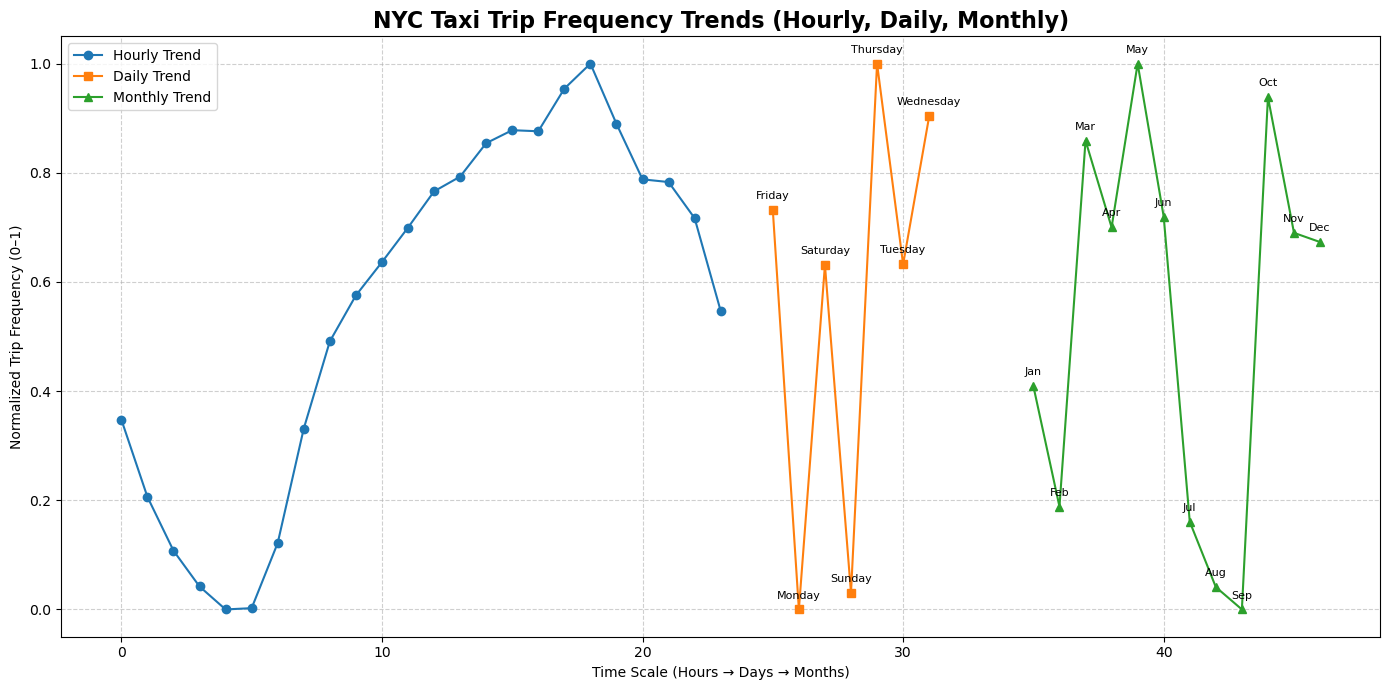

In [109]:
import calendar

# --- Normalize all three series (0 to 1) ---
hourly_norm = (hourly_trends - hourly_trends.min()) / (hourly_trends.max() - hourly_trends.min())
daily_norm = (daily_trends - daily_trends.min()) / (daily_trends.max() - daily_trends.min())
monthly_norm = (monthly_trends - monthly_trends.min()) / (monthly_trends.max() - monthly_trends.min())

# --- Ensure numeric x-axis values ---
hour_x = range(len(hourly_norm))
day_x = [x + 25 for x in range(len(daily_norm))]     # offset daily points to the right
month_x = [x + 35 for x in range(len(monthly_norm))] # offset monthly points further right

# --- Plot all three on one graph ---
plt.figure(figsize=(14, 7))

plt.plot(hour_x, hourly_norm.values, marker='o', label='Hourly Trend', color='tab:blue')
plt.plot(day_x, daily_norm.values, marker='s', label='Daily Trend', color='tab:orange')
plt.plot(month_x, monthly_norm.values, marker='^', label='Monthly Trend', color='tab:green')

# --- Aesthetic Enhancements ---
plt.title('NYC Taxi Trip Frequency Trends (Hourly, Daily, Monthly)', fontsize=16, fontweight='bold')
plt.ylabel('Normalized Trip Frequency (0–1)')
plt.xlabel('Time Scale (Hours → Days → Months)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Add labels for readability
for i, d in enumerate(daily_norm.index):
    plt.text(day_x[i], daily_norm.values[i] + 0.02, str(d), ha='center', fontsize=8)
    
month_labels = [calendar.month_abbr[m] for m in monthly_trends.index]
for i, m in enumerate(month_labels):
    plt.text(month_x[i], monthly_norm.values[i] + 0.02, m, ha='center', fontsize=8)

plt.tight_layout()
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [110]:
# Analyse the above parameters

# Columns to check
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

print("Checking for negative values:")
for col in columns_to_check:
    negative_count = (new_df[col] < 0).sum()
    if negative_count > 0:
        print(f"Column '{col}' contains {negative_count} negative value(s).")
    else:
        print(f"Column '{col}' contains no negative values.")

print("\nChecking for zero values:")
for col in columns_to_check:
    zero_count = (new_df[col] == 0).sum()
    if zero_count > 0:
        print(f"Column '{col}' contains {zero_count} zero value(s).")
    else:
        print(f"Column '{col}' contains no zero values.")

Checking for negative values:
Column 'fare_amount' contains no negative values.
Column 'tip_amount' contains no negative values.
Column 'total_amount' contains no negative values.
Column 'trip_distance' contains no negative values.

Checking for zero values:
Column 'fare_amount' contains 85 zero value(s).
Column 'tip_amount' contains 57400 zero value(s).
Column 'total_amount' contains 29 zero value(s).
Column 'trip_distance' contains 3171 zero value(s).


In [111]:
# droping rows in df where trip_distance is equal to zero
# new_df = new_df[new_df['trip_distance'] != 0]

In [112]:
# droping rows in df where trip_distance is equal to zero
new_df = new_df[new_df['fare_amount'] != 0]

In [113]:
# Columns to check
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

print("Checking for negative values:")
for col in columns_to_check:
    negative_count = (new_df[col] < 0).sum()
    if negative_count > 0:
        print(f"Column '{col}' contains {negative_count} negative value(s).")
    else:
        print(f"Column '{col}' contains no negative values.")

print("\nChecking for zero values:")
for col in columns_to_check:
    zero_count = (new_df[col] == 0).sum()
    if zero_count > 0:
        print(f"Column '{col}' contains {zero_count} zero value(s).")
    else:
        print(f"Column '{col}' contains no zero values.")

Checking for negative values:
Column 'fare_amount' contains no negative values.
Column 'tip_amount' contains no negative values.
Column 'total_amount' contains no negative values.
Column 'trip_distance' contains no negative values.

Checking for zero values:
Column 'fare_amount' contains no zero values.
Column 'tip_amount' contains 57322 zero value(s).
Column 'total_amount' contains no zero values.
Column 'trip_distance' contains 3138 zero value(s).


In [114]:
new_df.shape

(256562, 22)

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [115]:
# Create a df with non zero entries for the selected parameters.

columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

print("Checking for negative values:")
for col in columns_to_check:
    negative_count = (new_df[col] < 0).sum()
    if negative_count > 0:
        print(f"Column '{col}' contains {negative_count} negative value(s).")
    else:
        print(f"Column '{col}' contains no negative values.")

print("\nChecking for zero values:")
for col in columns_to_check:
    zero_count = (new_df[col] == 0).sum()
    if zero_count > 0:
        print(f"Column '{col}' contains {zero_count} zero value(s).")
    else:
        print(f"Column '{col}' contains no zero values.")

Checking for negative values:
Column 'fare_amount' contains no negative values.
Column 'tip_amount' contains no negative values.
Column 'total_amount' contains no negative values.
Column 'trip_distance' contains no negative values.

Checking for zero values:
Column 'fare_amount' contains no zero values.
Column 'tip_amount' contains 57322 zero value(s).
Column 'total_amount' contains no zero values.
Column 'trip_distance' contains 3138 zero value(s).


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [116]:
new_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'combined_airport_fee',
       'pickup_hour', 'pickup_day', 'month'],
      dtype='object')

In [117]:
# Group data by month and analyse monthly revenue
monthly_revenue = new_df.groupby('month')['total_amount'].sum()

# Analyze the Trend
print("Monthly Revenue Trend:")
print(monthly_revenue)

Monthly Revenue Trend:
month
1     569501.60
2     539582.16
3     648653.57
4     634447.82
5     694689.77
6     654877.72
7     563114.23
8     551145.96
9     569088.56
10    699488.45
11    640012.79
12    640371.99
Name: total_amount, dtype: float64


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [118]:
# Calculate proportion of each quarter

#  Extract the quarter
new_df['quarter'] = new_df['tpep_pickup_datetime'].dt.quarter

In [119]:
#   Calculate total revenue per quarter
quarterly_revenue = new_df.groupby('quarter')['total_amount'].sum()

In [120]:
#  Calculate total annual revenue
total_annual_revenue = quarterly_revenue.sum()

In [121]:
#  Calculate the proportion
quarterly_proportion = quarterly_revenue / total_annual_revenue

In [122]:
print("Quarterly Revenue Proportions:")
print(quarterly_proportion)

Quarterly Revenue Proportions:
quarter
1    0.237372
2    0.267930
3    0.227327
4    0.267371
Name: total_amount, dtype: float64


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

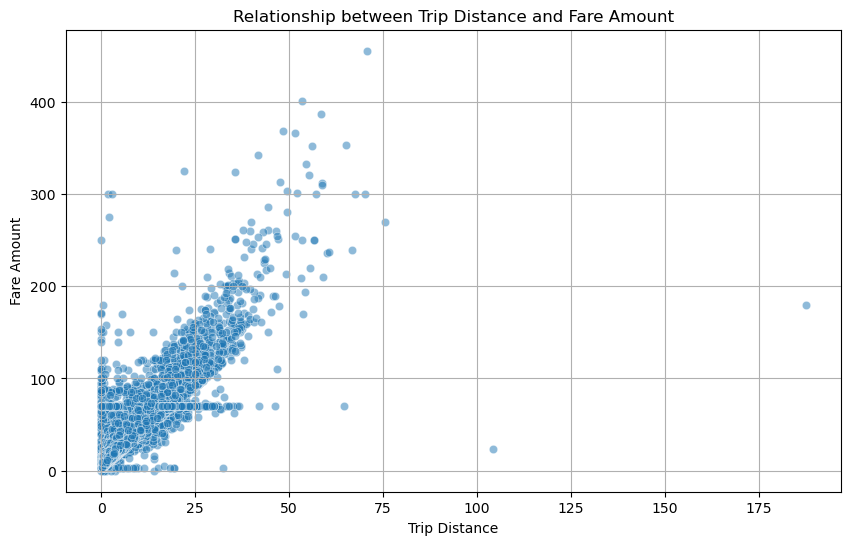

In [123]:
# Show how trip fare is affected by distance

# Filter out rows where trip_distance is 0
df_filtered =new_df[new_df['trip_distance'] != 0].copy()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_filtered, alpha=0.5)
plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

In [124]:
import calendar
# Creating a mapping dictionary for month numbers to full month names
month_mapping = {i: calendar.month_name[i] for i in range(1, 13)}

# Mapping the 'month' column to 'Month_Name'
df_filtered['month_name'] = df_filtered['month'].map(month_mapping)

In [125]:
# Calculating Correlation
correlation = df_filtered['trip_distance'].corr(df_filtered['fare_amount'])
print(f"The correlation between trip_distance and fare_amount is: {correlation}")

The correlation between trip_distance and fare_amount is: 0.9429383749085931


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [126]:
df_filtered['tpep_pickup_datetime'] = pd.to_datetime(df_filtered['tpep_pickup_datetime'])
df_filtered['tpep_dropoff_datetime'] = pd.to_datetime(df_filtered['tpep_dropoff_datetime'])
# Calculate Trip Duration
df_filtered['trip_duration'] = (df_filtered['tpep_dropoff_datetime'] - df_filtered['tpep_pickup_datetime']).dt.seconds / 60

In [127]:
# Show relationship between fare and trip duration
# Show relationship between fare and number of passengers
# Show relationship between tip and trip distance
# Calculate Correlations
correlation_fare_duration = df_filtered['fare_amount'].corr(df_filtered['trip_duration'])
correlation_fare_passenger = df_filtered['fare_amount'].corr(df_filtered['passenger_count'])
correlation_tip_distance = df_filtered['tip_amount'].corr(df_filtered['trip_distance'])

print(f"Correlation between fare_amount and trip_duration: {correlation_fare_duration:.2f}")
print(f"Correlation between fare_amount and passenger_count: {correlation_fare_passenger:.2f}")
print(f"Correlation between tip_amount and trip_distance: {correlation_tip_distance:.2f}")

Correlation between fare_amount and trip_duration: 0.28
Correlation between fare_amount and passenger_count: 0.04
Correlation between tip_amount and trip_distance: 0.59


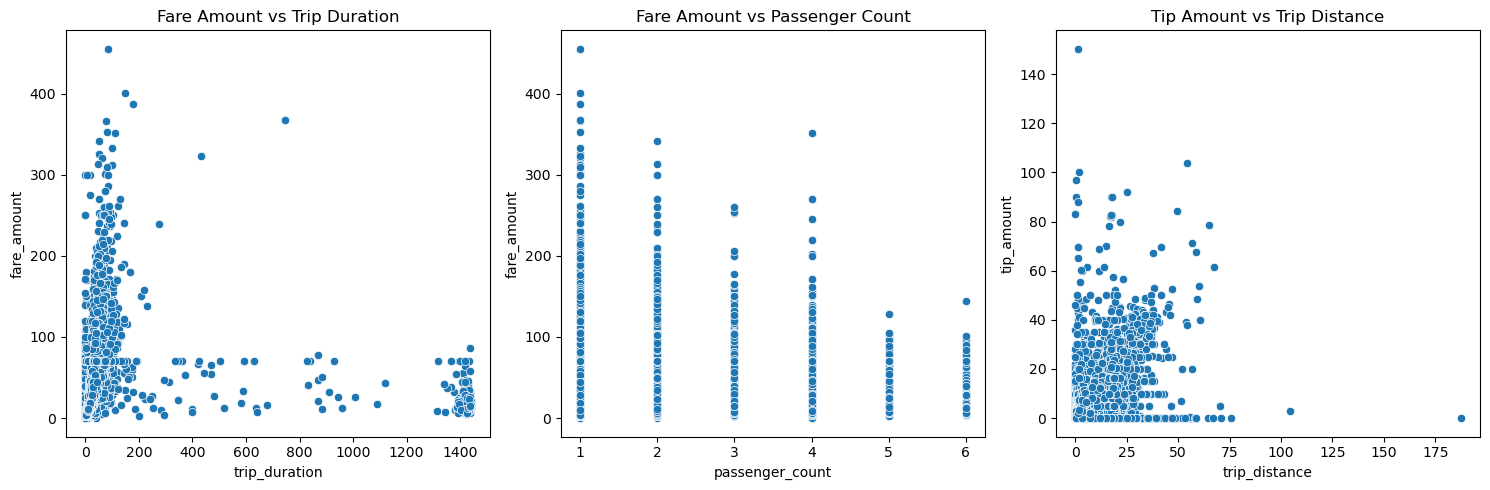

In [128]:
 # Scatter plot
    
 
plt.figure(figsize=(15, 5))
    
plt.subplot(1, 3, 1)
sns.scatterplot(x='trip_duration', y='fare_amount', data=df_filtered)
plt.title('Fare Amount vs Trip Duration')
    
plt.subplot(1, 3, 2)
sns.scatterplot(x='passenger_count', y='fare_amount', data=df_filtered)
plt.title('Fare Amount vs Passenger Count')
    
plt.subplot(1, 3, 3)
sns.scatterplot(x='trip_distance', y='tip_amount', data=df_filtered)
plt.title('Tip Amount vs Trip Distance')
    
plt.tight_layout()
plt.show()

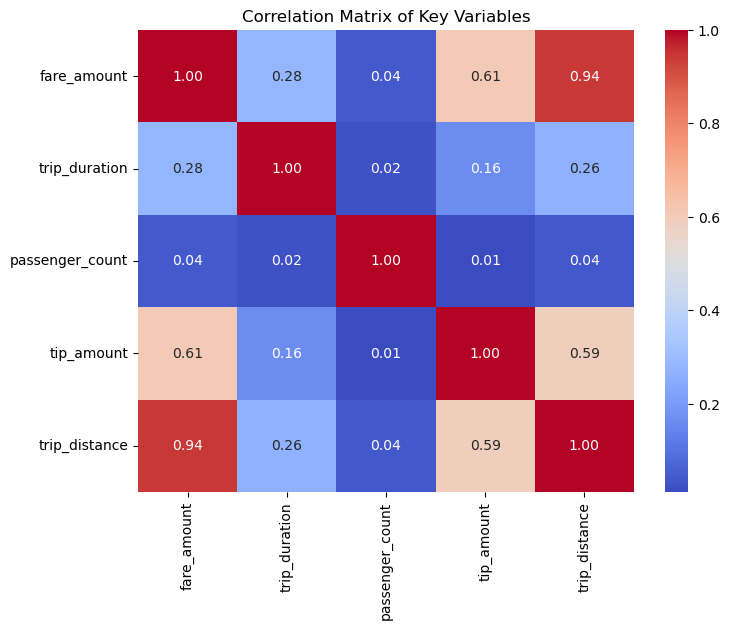

In [129]:
# Create a sub-dataframe with relevant columns for a heatmap

correlation_matrix_data = df_filtered[['fare_amount', 'trip_duration', 'passenger_count', 'tip_amount', 'trip_distance']]
correlation_matrix = correlation_matrix_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Variables')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [130]:
df_filtered['trip_duration'].value_counts(ascending=True)

trip_duration
143.933333      1
77.966667       1
88.500000       1
71.950000       1
88.566667       1
             ... 
6.533333      262
6.600000      262
7.850000      262
7.066667      262
6.933333      263
Name: count, Length: 5558, dtype: int64

In [131]:
# Analyse the distribution of different payment types (payment_type).
# Map payment types to descriptive names (example mapping)
payment_type_map = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge', 
    4: 'Dispute',   
}
df_filtered['payment_type_described'] = df_filtered['payment_type'].map(payment_type_map)

# Getting the distribution
payment_counts = df_filtered['payment_type_described'].value_counts()
print(payment_counts)



payment_type_described
Credit Card    207245
Cash            43557
Dispute          1703
No Charge         919
Name: count, dtype: int64


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



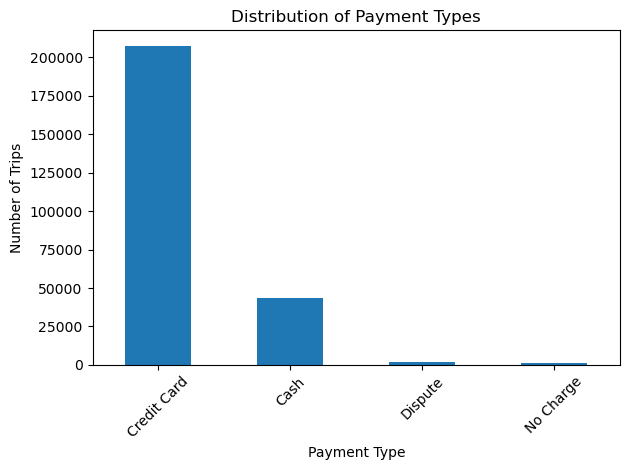

In [132]:
payment_counts.plot(kind='bar')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45) # Rotating x-axis labels for better readability
plt.tight_layout() # Adjusting layout to prevent labels from overlapping
plt.show()

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [133]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [134]:
# import geopandas as gpd
# done above
# Read the shapefile using geopandas


shapefile_path = r"C:\Users\Admin\Desktop\upgrad\NYC Taxi EDA project\Datasets and Dictionary\taxi_zones\taxi_zones.shp"  
zones = gpd.read_file(shapefile_path)
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

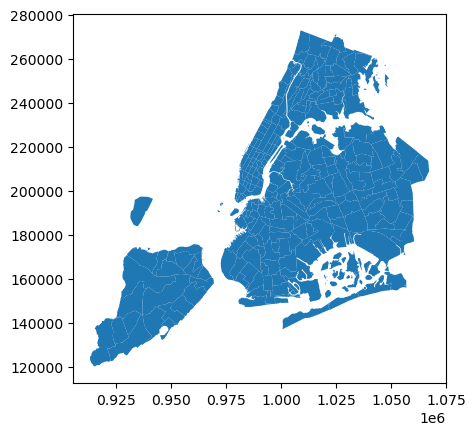

In [135]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [136]:
# Merge zones and trip records using locationID and PULocationID

merged_df = pd.merge(zones, df_filtered, left_on='LocationID', right_on='PULocationID', how='left')
merged_df.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,...,total_amount,congestion_surcharge,combined_airport_fee,pickup_hour,pickup_day,month,quarter,month_name,trip_duration,payment_type_described
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2.0,2023-03-11 16:06:04,2023-03-11 16:06:18,...,73.20,0.0,0.0,16.0,Saturday,3.0,1.0,March,0.233333,Credit Card
1,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2.0,2023-06-11 11:38:07,2023-06-11 11:40:04,...,180.19,0.0,0.0,11.0,Sunday,6.0,2.0,June,1.950000,Credit Card
2,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2.0,2023-08-01 13:26:32,2023-08-01 13:26:43,...,96.00,0.0,0.0,13.0,Tuesday,8.0,3.0,August,0.183333,Credit Card
3,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2.0,2023-02-18 20:24:24,2023-02-18 20:24:28,...,26.00,0.0,0.0,20.0,Saturday,2.0,1.0,February,0.066667,Credit Card
4,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2.0,2023-05-13 06:36:35,2023-05-13 06:36:42,...,169.20,0.0,0.0,6.0,Saturday,5.0,2.0,May,0.116667,Credit Card


In [137]:
merged_df.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'combined_airport_fee',
       'pickup_hour', 'pickup_day', 'month', 'quarter', 'month_name',
       'trip_duration', 'payment_type_described'],
      dtype='object')

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [138]:
merged_df['PULocationID'].value_counts(ascending = True)

PULocationID
5.0          1
31.0         1
46.0         1
44.0         1
118.0        1
         ...  
162.0     9231
236.0    10753
161.0    11959
237.0    12068
132.0    13323
Name: count, Length: 232, dtype: int64

In [139]:
# Group data by location and calculate the number of trips
trip_counts = merged_df.groupby("PULocationID").size().reset_index(name="Total Trips")

print(trip_counts)


     PULocationID  Total Trips
0             1.0            5
1             3.0            7
2             4.0          242
3             5.0            1
4             6.0            3
..            ...          ...
227         259.0            3
228         260.0           37
229         261.0         1349
230         262.0         3252
231         263.0         4847

[232 rows x 2 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [140]:
# Renaming for clarity
trip_counts = trip_counts.rename(columns={"PULocationID": "LocationID"})

In [141]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_counts = zones.merge(
    trip_counts,
    on="LocationID",
    how="left"   # keeping all zones even if no trips
)


In [142]:
zones_with_counts.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,Total Trips
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",5.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",NaN
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",7.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",242.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",1.0


In [143]:
zones_with_counts["Total Trips"] = zones_with_counts["Total Trips"].fillna(0)

zones_with_counts

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,Total Trips
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",5.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",0.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",7.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",242.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",1.0
...,...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ...",3.0
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ...",37.0
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19...",1349.0
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824....",3252.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

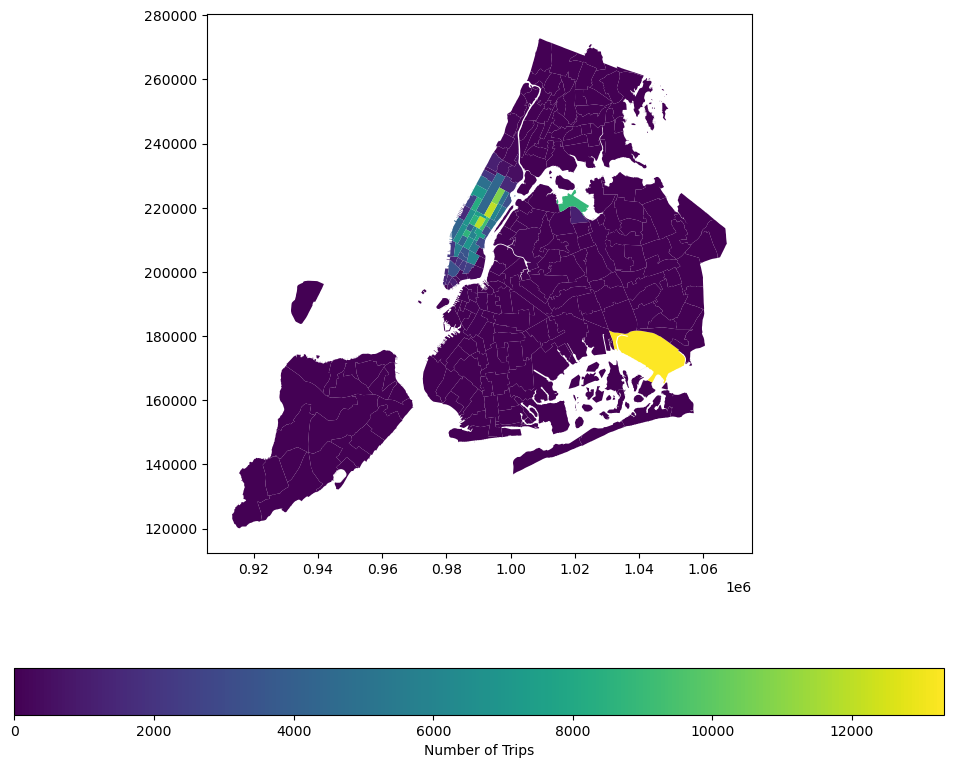

In [144]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
# Plot the map and display it
zones_with_counts.plot(
    column="Total Trips",     # column used for coloring
    ax=ax,
    legend=True,
    legend_kwds={
        'label': "Number of Trips",
        'orientation': "horizontal"   
    }
    
)

plt.show()

In [145]:
# can you try displaying the zones DF sorted by the number of trips?

zones_with_counts_sorted = zones_with_counts.sort_values(
    by="Total Trips",
    ascending=False
)
zones_with_counts_sorted 

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,Total Trips
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",13323.0
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",12068.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",11959.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",10753.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",9231.0
...,...,...,...,...,...,...,...,...
83,84,0.233624,0.002074,Eltingville/Annadale/Prince's Bay,84,Staten Island,"POLYGON ((939754.454 131548.91, 939802.804 131...",0.0
29,30,0.094510,0.000146,Broad Channel,30,Queens,"POLYGON ((1034013.272 163473.152, 1034866.459 ...",0.0
26,27,0.202509,0.001341,Breezy Point/Fort Tilden/Riis Beach,27,Queens,"POLYGON ((1021692.969 147138.664, 1021883.624 ...",0.0
244,245,0.095983,0.000466,West Brighton,245,Staten Island,"POLYGON ((957085.564 172591.26, 957142.385 172...",0.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


In [146]:
df_filtered.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'combined_airport_fee',
       'pickup_hour', 'pickup_day', 'month', 'quarter', 'month_name',
       'trip_duration', 'payment_type_described'],
      dtype='object')

## Busiest hours, days and months

In [147]:
busiest_hours = df_filtered.groupby("pickup_hour").size().reset_index(name="num_trips")
busiest_days = df_filtered.groupby("pickup_day").size().reset_index(name="num_trips")
busiest_months = df_filtered.groupby("month_name").size().reset_index(name="num_trips")
print(busiest_hours)
print(busiest_days)
print(busiest_months)


    pickup_hour  num_trips
0             0       7056
1             1       4721
2             2       3092
3             3       2008
4             4       1288
5             5       1342
6             6       3319
7             7       6807
8             8       9443
9             9      10842
10           10      11842
11           11      12865
12           12      13955
13           13      14441
14           14      15464
15           15      15814
16           16      15792
17           17      17092
18           18      17884
19           19      16062
20           20      14390
21           21      14319
22           22      13212
23           23      10374
  pickup_day  num_trips
0     Friday      37517
1     Monday      31556
2   Saturday      36806
3     Sunday      31856
4   Thursday      39802
5    Tuesday      36832
6  Wednesday      39055
   month_name  num_trips
0       April      21982
1      August      18703
2    December      21799
3    February      19448
4     Ja

In [148]:
busiest_hour = busiest_hours.sort_values(
    by="num_trips",
    ascending=False
)
print('\n')
busiest_hour

,pickup_hour,num_trips
18,18,17884
17,17,17092
19,19,16062
15,15,15814
16,16,15792
14,14,15464
13,13,14441
20,20,14390
21,21,14319
12,12,13955


In [149]:
busiest_day = busiest_days.sort_values(
    by="num_trips",
    ascending=False
)
print('\n')
busiest_day

,pickup_day,num_trips
4,Thursday,39802
6,Wednesday,39055
0,Friday,37517
5,Tuesday,36832
2,Saturday,36806
3,Sunday,31856
1,Monday,31556


In [150]:
busiest_month = busiest_months.sort_values(
    by="num_trips",
    ascending=False
)
print('\n')
busiest_month

,month_name,num_trips
8,May,23400
10,October,23124
7,March,22709
6,June,22038
0,April,21982
9,November,21930
2,December,21799
4,January,20517
3,February,19448
5,July,19265


## Trends in revenue collected

In [151]:
# revenue is total of amount collected
# Calculate total revenue per trip
df_filtered["total_revenue"] = (
    df_filtered["tip_amount"] +
    df_filtered["total_amount"] 
)
# Daily revenue
daily_revenue = (
    df_filtered.groupby(df_filtered["tpep_pickup_datetime"].dt.date)["total_revenue"]
    .sum()
    .reset_index()
)
# monthly revenue
monthly_revenue = (
    df_filtered.groupby(df_filtered["month_name"])["total_revenue"]
    .sum()
    .reset_index()
)
# quaterly revenue
quarterly_revenue = (
    df_filtered.groupby(df_filtered["quarter"])["total_revenue"]
    .sum()
    .reset_index()
)
print(daily_revenue)
print('\n')
print(monthly_revenue)
print('\n')
print(quarterly_revenue)

    tpep_pickup_datetime  total_revenue
0             2023-01-01       16821.14
1             2023-01-02       15231.45
2             2023-01-03       19392.72
3             2023-01-04       19751.74
4             2023-01-05       20929.47
..                   ...            ...
358           2023-12-27       18305.21
359           2023-12-28       19216.42
360           2023-12-29       19198.08
361           2023-12-30       17156.19
362           2023-12-31       15602.34

[363 rows x 2 columns]


   month_name  total_revenue
0       April      701632.11
1      August      606742.86
2    December      707583.03
3    February      599322.02
4     January      630628.33
5        July      618294.08
6        June      725531.10
7       March      719375.76
8         May      769445.28
9    November      711813.57
10    October      776692.93
11  September      627493.35


   quarter  total_revenue
0        1     1949326.11
1        2     2196608.49
2        3     1852530.29
3        4 

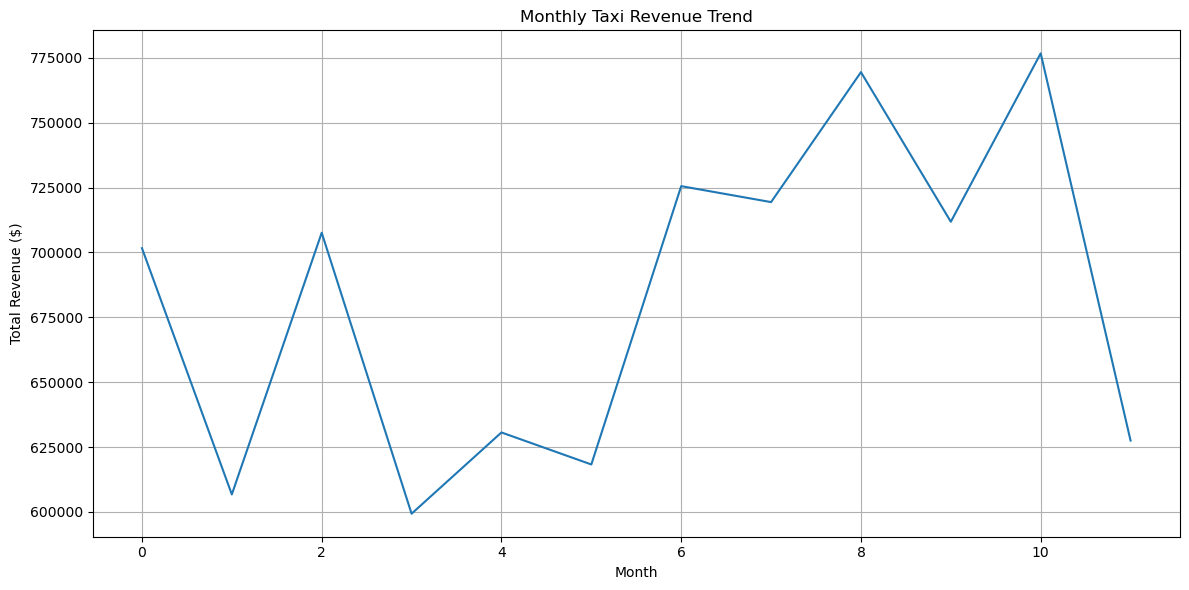

In [152]:
# Plot monthly revenue trend
plt.figure(figsize=(12,6))
plt.plot(monthly_revenue["total_revenue"])
plt.title("Monthly Taxi Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.grid(True)
plt.tight_layout()
plt.show()




#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [153]:

df_filtered['trip_duration']
df_filtered.columns



Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'combined_airport_fee',
       'pickup_hour', 'pickup_day', 'month', 'quarter', 'month_name',
       'trip_duration', 'payment_type_described', 'total_revenue'],
      dtype='object')

In [154]:
# Find routes which have the slowest speeds at different times of the day
# Group by route + hour
route_stats = (
    df_filtered.groupby(["PULocationID", "DOLocationID", "pickup_hour"])
    .agg(
        avg_distance=("trip_distance", "mean"),
        avg_duration=("trip_duration", "mean"),
        trip_count=("trip_distance", "count")
    )
    .reset_index()
)


In [155]:
# Calculate average speed
# speed in miles per hour
route_stats["avg_speed_mph"] = route_stats["avg_distance"] / (route_stats["avg_duration"] / 60)

In [156]:
slowest_routes = (
    route_stats.sort_values(["pickup_hour", "avg_speed_mph"])
    .groupby("pickup_hour")
    
)
slowest_routes.head(5)   # Top 5 slowest per hour

,PULocationID,DOLocationID,pickup_hour,avg_distance,avg_duration,trip_count,avg_speed_mph
11529,88,144,0,1.780000,1425.466667,1,0.074923
43164,211,229,0,3.760000,1439.250000,1,0.156748
14754,107,137,0,0.660000,242.561111,6,0.163258
47445,231,231,0,1.177500,354.175000,4,0.199478
39298,170,87,0,5.240000,1434.516667,1,0.219168
...,...,...,...,...,...,...,...
45314,230,48,23,0.816667,124.901389,12,0.392309
28352,142,230,23,1.000000,134.275758,11,0.446842
6309,68,68,23,1.111000,148.718333,10,0.448230
6482,68,107,23,1.572500,187.495833,8,0.503211


In [157]:
print(route_stats.columns)

Index(['PULocationID', 'DOLocationID', 'pickup_hour', 'avg_distance',
       'avg_duration', 'trip_count', 'avg_speed_mph'],
      dtype='object')


In [158]:
route_stats["avg_speed_mph"].value_counts()

avg_speed_mph
9.000000     31
12.000000    26
10.285714    14
15.000000    13
8.000000     13
             ..
10.295867     1
12.548596     1
12.858892     1
14.084774     1
18.793774     1
Name: count, Length: 57174, dtype: int64

In [159]:
# Filtering out rare routes (so noise doesn’t dominate)
filtered_routes = route_stats[route_stats["trip_count"] > 50]


In [160]:
# Use fewer top routes (e.g. busiest 20 routes)
top_routes = (
    filtered_routes.groupby(["PULocationID", "DOLocationID"])["trip_count"]
    .sum()
    .nlargest(20)
    .reset_index()[["PULocationID", "DOLocationID"]]
)

filtered_routes = filtered_routes.merge(top_routes, on=["PULocationID", "DOLocationID"])


In [161]:
# Add simpler and more understandable zone names
filtered_routes = (
    filtered_routes
    .merge(zones_with_counts_sorted [["LocationID", "zone"]], left_on="PULocationID", right_on="LocationID", how="left")
    .rename(columns={"zone": "Pickup_Zone"})
    .drop("LocationID", axis=1)
    .merge(zones_with_counts_sorted [["LocationID", "zone"]], left_on="DOLocationID", right_on="LocationID", how="left")
    .rename(columns={"zone": "Dropoff_Zone"})
    .drop("LocationID", axis=1)
)

# Create a route label
filtered_routes["Route"] = filtered_routes["Pickup_Zone"] + " → " + filtered_routes["Dropoff_Zone"]


In [162]:
# Pivot for heatmap
pivot = filtered_routes.pivot_table(
    index="Route",
    columns="pickup_hour",
    values="avg_speed_mph"
)


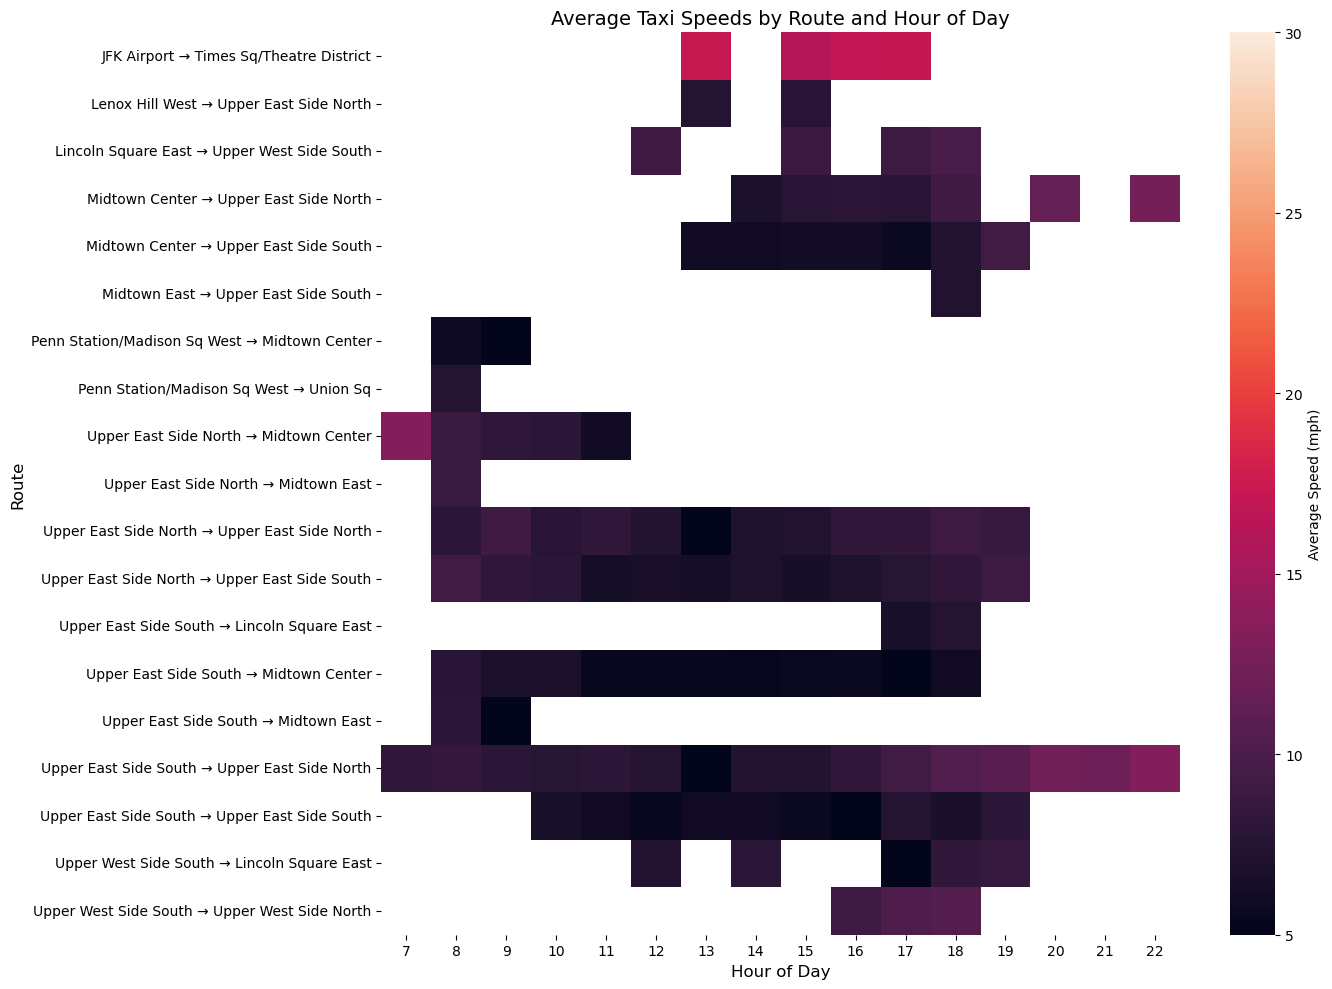

In [163]:
# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(
    pivot,
    cbar_kws={'label': 'Average Speed (mph)'},
    annot=False,
    vmin=5, vmax=30   # force scale to realistic taxi speeds
)

plt.title("Average Taxi Speeds by Route and Hour of Day", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Route", fontsize=12)
plt.tight_layout()
plt.show()


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [164]:
# busiest_hour
print("Busiest Hour:", busiest_hour["pickup_hour"], "with", busiest_hour["num_trips"], "trips")

Busiest Hour: 18    18
17    17
19    19
15    15
16    16
14    14
13    13
20    20
21    21
12    12
22    22
11    11
10    10
9      9
23    23
8      8
0      0
7      7
1      1
6      6
2      2
3      3
5      5
4      4
Name: pickup_hour, dtype: int32 with 18    17884
17    17092
19    16062
15    15814
16    15792
14    15464
13    14441
20    14390
21    14319
12    13955
22    13212
11    12865
10    11842
9     10842
23    10374
8      9443
0      7056
7      6807
1      4721
6      3319
2      3092
3      2008
5      1342
4      1288
Name: num_trips, dtype: int64 trips


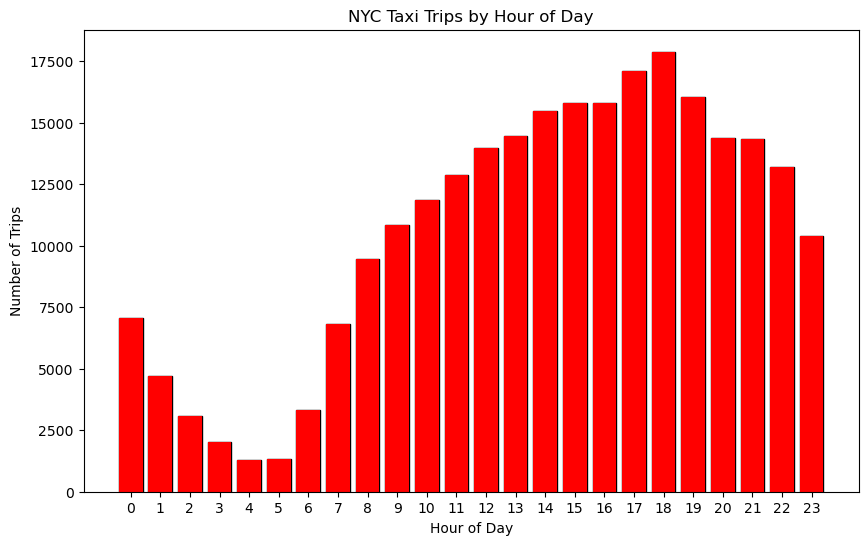

In [165]:
# Visualise the number of trips per hour and find the busiest hour
plt.figure(figsize=(10,6))
plt.bar(busiest_hours["pickup_hour"], busiest_hours["num_trips"], color="skyblue", edgecolor="black")
plt.xticks(range(24))
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.title("NYC Taxi Trips by Hour of Day")

# Highlighting busiest hour
plt.bar(busiest_hour["pickup_hour"], busiest_hour["num_trips"], color="red")

plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [166]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.007

# Scale up
busiest_hours["scaled_num_trips"] = busiest_hours["num_trips"] / sample_fraction



In [167]:
# Finding busiest hour (scaled)

busiest_hour = busiest_hours.loc[busiest_hours["scaled_num_trips"].idxmax()]
print(f"Busiest Hour: {busiest_hour['pickup_hour']} with approx {int(busiest_hour['scaled_num_trips']):,} trips")


Busiest Hour: 18.0 with approx 2,554,857 trips


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

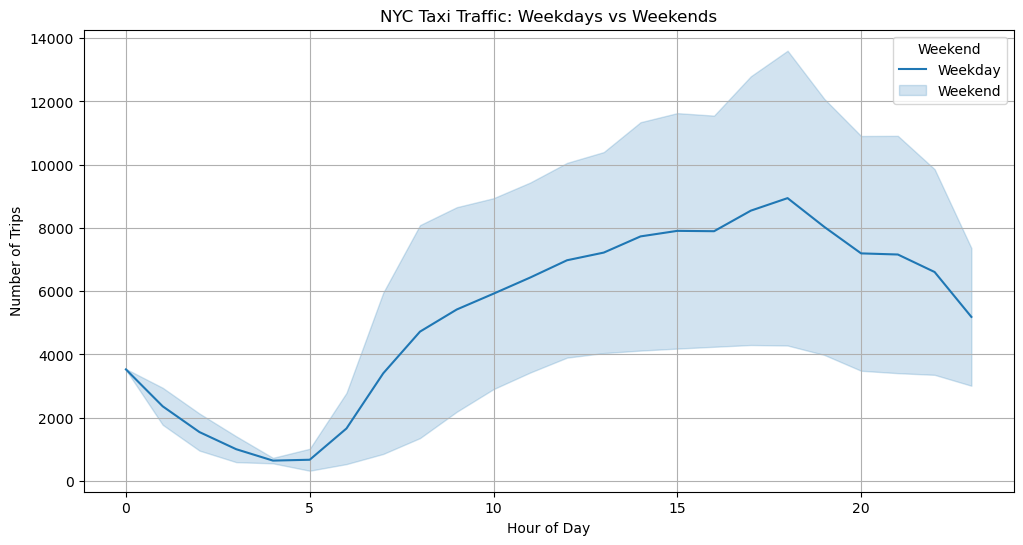

In [168]:
# Compare traffic trends for the week days and weekends
# Extract day of week as integer: 0=Monday, 6=Sunday
df_filtered['pickup_day_in_num'] = df_filtered['tpep_pickup_datetime'].dt.dayofweek
# Marked weekends (Saturday=5, Sunday=6)
df_filtered['is_weekend'] = df_filtered['pickup_day_in_num'] >= 5

# Comparing Weekdays vs Weekends

traffic_trends = (
    df_filtered.groupby(['is_weekend', 'pickup_hour'])
    .size()
    .reset_index(name='num_of_trips')
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=traffic_trends, x='pickup_hour', y='num_of_trips')
plt.title("NYC Taxi Traffic: Weekdays vs Weekends")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.legend(title="Weekend", labels=["Weekday", "Weekend"])
plt.grid(True)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [169]:
merged_df.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'combined_airport_fee',
       'pickup_hour', 'pickup_day', 'month', 'quarter', 'month_name',
       'trip_duration', 'payment_type_described'],
      dtype='object')

In [170]:
# Find top 10 pickup and dropoff zones

# Merge pickup IDs with zone names
pickup_counts = (
    df_filtered.groupby("PULocationID")
    .size()
    .reset_index(name="num_pickups")
    .merge(zones_with_counts_sorted, left_on="PULocationID", right_on="LocationID")
    [["PULocationID", "borough", "zone", "num_pickups"]]
    .sort_values("num_pickups", ascending=False)
    .head(10)
)

# Merge dropoff IDs with zone names
dropoff_counts = (
    df_filtered.groupby("DOLocationID")
    .size()
    .reset_index(name="num_dropoffs")
    .merge(zones_with_counts_sorted, left_on="DOLocationID", right_on="LocationID")
    [["DOLocationID", "borough", "zone", "num_dropoffs"]]
    .sort_values("num_dropoffs", ascending=False)
    .head(10)
)

print("Top 10 Pickup Zones:")
print(pickup_counts)

print("\nTop 10 Dropoff Zones:")
print(dropoff_counts)



Top 10 Pickup Zones:
     PULocationID    borough                          zone  num_pickups
114           132     Queens                   JFK Airport        13323
209           237  Manhattan         Upper East Side South        12068
142           161  Manhattan                Midtown Center        11959
208           236  Manhattan         Upper East Side North        10753
143           162  Manhattan                  Midtown East         9231
120           138     Queens             LaGuardia Airport         8896
163           186  Manhattan  Penn Station/Madison Sq West         8680
202           230  Manhattan     Times Sq/Theatre District         8490
124           142  Manhattan           Lincoln Square East         8311
151           170  Manhattan                   Murray Hill         7501

Top 10 Dropoff Zones:
     DOLocationID    borough                       zone  num_dropoffs
224           236  Manhattan      Upper East Side North         11426
225           237  Manha

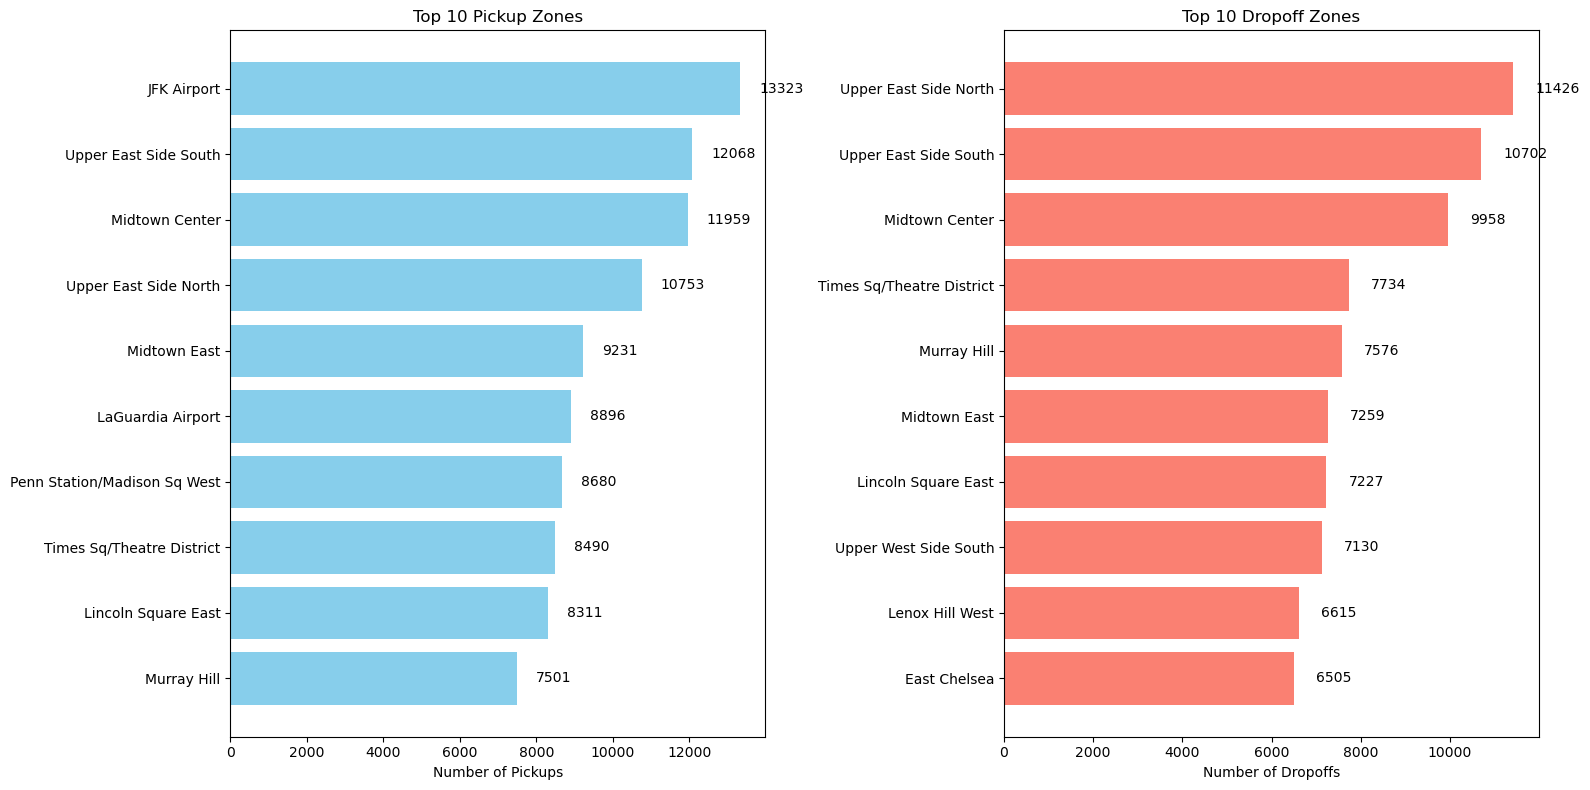

In [171]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot pickups
axes[0].barh(pickup_counts["zone"], pickup_counts["num_pickups"], color="skyblue")
axes[0].invert_yaxis()
axes[0].set_title("Top 10 Pickup Zones")
axes[0].set_xlabel("Number of Pickups")

# Annotate values
for i, v in enumerate(pickup_counts["num_pickups"]):
    axes[0].text(v + 500, i, str(v), va="center")

# Plot dropoffs
axes[1].barh(dropoff_counts["zone"], dropoff_counts["num_dropoffs"], color="salmon")
axes[1].invert_yaxis()
axes[1].set_title("Top 10 Dropoff Zones")
axes[1].set_xlabel("Number of Dropoffs")

# Annotate values
for i, v in enumerate(dropoff_counts["num_dropoffs"]):
    axes[1].text(v + 500, i, str(v), va="center")

plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [172]:


# Assuming your dataframe is named `new_df`
# and has columns: 'PULocationID', 'DOLocationID'
# and a zone lookup table `zones` with columns: LocationID, Zone

# --- Step 1: Count pickups and dropoffs ---
pickup_counts = df_filtered['PULocationID'].value_counts().rename('pickup_count')
dropoff_counts = df_filtered['DOLocationID'].value_counts().rename('dropoff_count')

# --- Step 2: Combine into a single dataframe ---
zone_summary = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)

# --- Step 3: Compute ratio ---
zone_summary['pickup_dropoff_ratio'] = (
    zone_summary['pickup_count'] / zone_summary['dropoff_count'].replace(0, pd.NA)
)

# --- Step 4: Add zone names for better readability ---
zone_summary = zone_summary.merge(zones_with_counts_sorted[['LocationID', 'zone']],
                                  left_index=True, right_on='LocationID', how='left')

# --- Step 5: Sort and display ---
zone_summary = zone_summary[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio','LocationID']]
zone_summary = zone_summary.sort_values('pickup_dropoff_ratio', ascending=False)

# View top & bottom zones
print(zone_summary.head(10))
print(zone_summary.tail(10))


                               zone  pickup_count  dropoff_count  \
69.0                  East Elmhurst        1166.0            129   
131.0                   JFK Airport       13323.0           2653   
137.0             LaGuardia Airport        8896.0           3018   
185.0  Penn Station/Madison Sq West        8680.0           5736   
42.0                   Central Park        4372.0           3132   
248.0                  West Village        5702.0           4168   
113.0       Greenwich Village South        3325.0           2470   
161.0                  Midtown East        9231.0           7259   
160.0                Midtown Center       11959.0           9958   
99.0               Garment District        4146.0           3485   

       pickup_dropoff_ratio  LocationID  
69.0               9.038760          70  
131.0              5.021862         132  
137.0              2.947647         138  
185.0              1.513250         186  
42.0               1.395913          43  

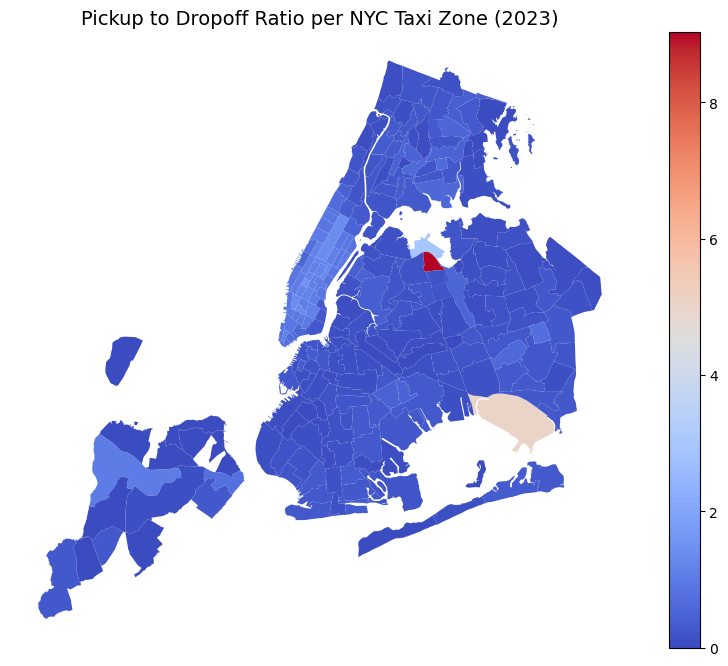

In [173]:

# Merge with zone shapefile (assuming `zones_gdf` has LocationID column)
zones_with_counts_sorted = zones_with_counts_sorted.merge(zone_summary, left_on='LocationID', right_on='LocationID', how='left')

# Plot spatial ratio
zones_with_counts_sorted.plot(column='pickup_dropoff_ratio', cmap='coolwarm', legend=True, figsize=(10,8))
plt.title('Pickup to Dropoff Ratio per NYC Taxi Zone (2023)', fontsize=14)
plt.axis('off')
plt.show()


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [176]:
zones_with_counts_sorted.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone_x', 'LocationID',
       'borough', 'geometry', 'Total Trips', 'zone_y', 'pickup_count',
       'dropoff_count', 'pickup_dropoff_ratio'],
      dtype='object')

In [177]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
# 2. Filter for night hours (23 to 5)

night_trips = df_filtered[df_filtered["pickup_hour"].isin([23,0,1,2,3,4,5])]

#  Top 10 Pickup Zones (Night only)

pickup_night = (
    night_trips.groupby("PULocationID")
    .size()
    .reset_index(name="num_pickups")
    .merge(zones_with_counts_sorted, left_on="PULocationID", right_on="LocationID")
    [["zone_x", "borough", "num_pickups"]]
    .sort_values("num_pickups", ascending=False)
    .head(10)
)

# Top 10 Dropoff Zones (Night only)

dropoff_night = (
    night_trips.groupby("DOLocationID")
    .size()
    .reset_index(name="num_dropoffs")
    .merge(zones_with_counts_sorted, left_on="DOLocationID", right_on="LocationID")
    [["zone_x", "borough", "num_dropoffs"]]
    .sort_values("num_dropoffs", ascending=False)
    .head(10)
)

print("Top 10 Night Pickup Zones:")
print(pickup_night)

print("\nTop 10 Night Dropoff Zones:")
print(dropoff_night)

Top 10 Night Pickup Zones:
                           zone_x    borough  num_pickups
46                   East Village  Manhattan         2183
77                    JFK Airport     Queens         2000
154                  West Village  Manhattan         1767
26                   Clinton East  Manhattan         1427
91                Lower East Side  Manhattan         1366
139     Times Sq/Theatre District  Manhattan         1193
67        Greenwich Village South  Manhattan         1176
114  Penn Station/Madison Sq West  Manhattan          968
82              LaGuardia Airport     Queens          876
103                 Midtown South  Manhattan          840

Top 10 Night Dropoff Zones:
                            zone_x    borough  num_dropoffs
76                    East Village  Manhattan          1167
44                    Clinton East  Manhattan           971
157                    Murray Hill  Manhattan           864
65                    East Chelsea  Manhattan           824
99    

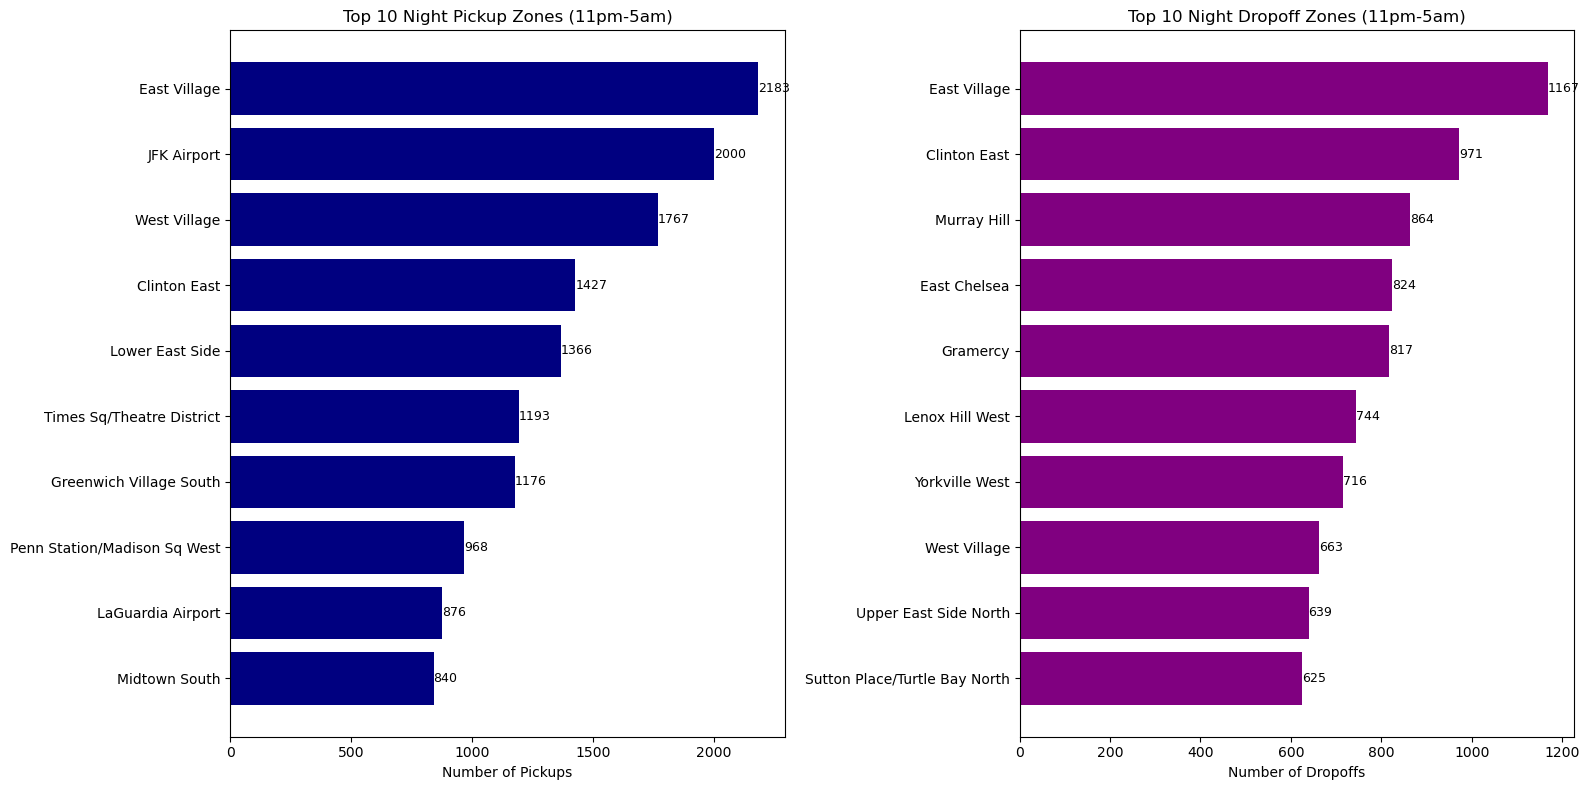

In [178]:
# visualisation

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Pickup
axes[0].barh(pickup_night["zone_x"], pickup_night["num_pickups"], color="navy")
axes[0].invert_yaxis()
axes[0].set_title("Top 10 Night Pickup Zones (11pm-5am)")
axes[0].set_xlabel("Number of Pickups")

for i, v in enumerate(pickup_night["num_pickups"]):
    axes[0].text(v, i, str(v), va="center", ha="left", fontsize=9, color="black")

# Dropoff
axes[1].barh(dropoff_night["zone_x"], dropoff_night["num_dropoffs"], color="purple")
axes[1].invert_yaxis()
axes[1].set_title("Top 10 Night Dropoff Zones (11pm-5am)")
axes[1].set_xlabel("Number of Dropoffs")

for i, v in enumerate(dropoff_night["num_dropoffs"]):
    axes[1].text(v, i, str(v), va="center", ha="left", fontsize=9, color="black")

plt.tight_layout()
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [179]:
# Filter for night hours (11 PM to 5 AM)
def time_of_day(hour):
    if hour in [23,0,1,2,3,4,5]:
        return "Night"
    else:
        return "Day"

df_filtered["time_period"] = df_filtered["pickup_hour"].apply(time_of_day)


revenue_share = (
    df_filtered.groupby("time_period")["total_amount"]
    .sum()
    .reset_index()
)

# Add percentage share
total_revenue = revenue_share["total_amount"].sum()
revenue_share["share_percent"] = 100 * revenue_share["total_amount"] / total_revenue

print(revenue_share)


  time_period  total_amount  share_percent
0         Day    6409871.80      87.962737
1       Night     877159.03      12.037263


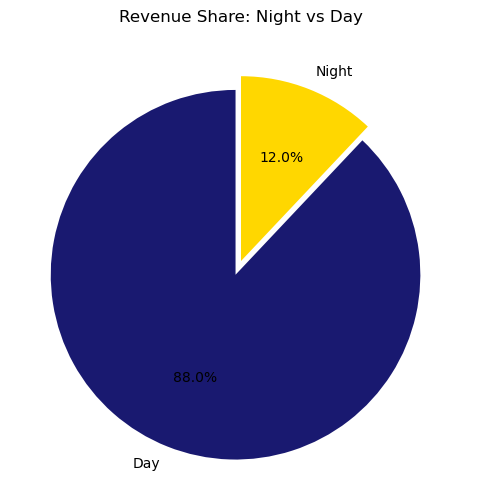

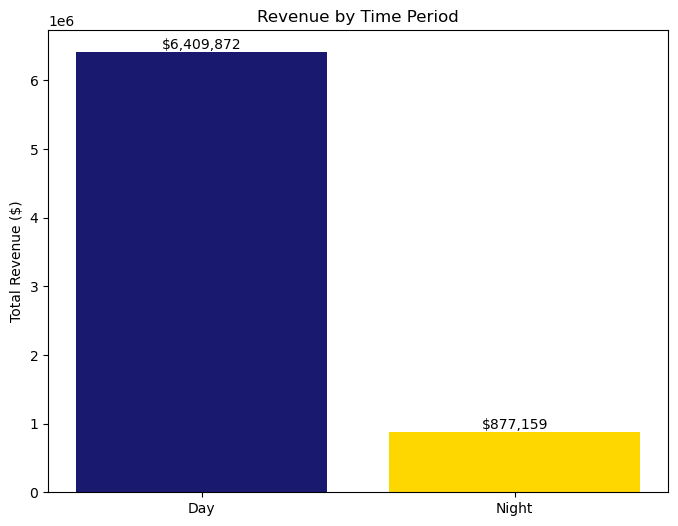

In [180]:
# Visualization 
# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    revenue_share["total_amount"],
    labels=revenue_share["time_period"],
    autopct="%1.1f%%",
    colors=["midnightblue","gold"],
    startangle=90,
    explode=(0.08,0)  # highlight Night slice
)
plt.title("Revenue Share: Night vs Day")
plt.show()

# Bar chart
plt.figure(figsize=(8,6))
plt.bar(revenue_share["time_period"], revenue_share["total_amount"], color=["midnightblue","gold"])
plt.title("Revenue by Time Period")
plt.ylabel("Total Revenue ($)")
for i, v in enumerate(revenue_share["total_amount"]):
    plt.text(i, v, f"${v:,.0f}", ha="center", va="bottom", fontsize=10)
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [181]:
df_filtered.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'combined_airport_fee',
       'pickup_hour', 'pickup_day', 'month', 'quarter', 'month_name',
       'trip_duration', 'payment_type_described', 'total_revenue',
       'pickup_day_in_num', 'is_weekend', 'time_period'],
      dtype='object')

   passenger_count  fare_per_mile_per_passenger
0              1.0                    10.729120
1              2.0                     6.185374
2              3.0                     4.332130
3              4.0                     5.182434
4              5.0                     1.565300
5              6.0                     1.285477


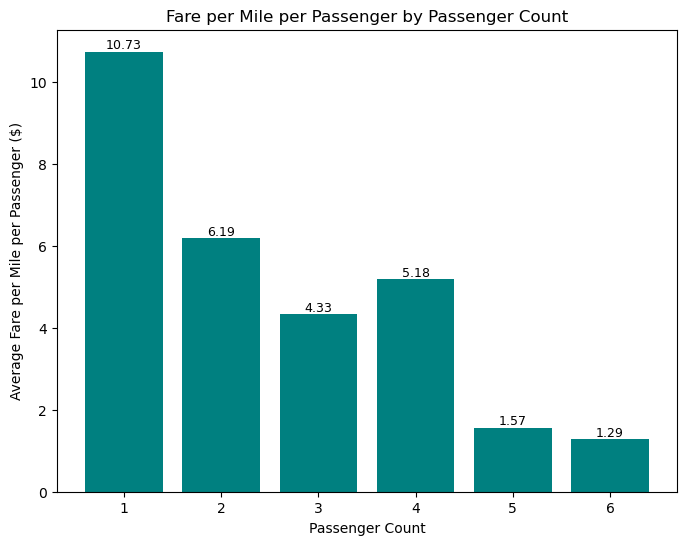

In [182]:
# Analyse the fare per mile per passenger for different passenger counts

df_filtered["fare_per_mile"] = df_filtered["fare_amount"] / df_filtered["trip_distance"]

df_filtered["fare_per_mile_per_passenger"] = df_filtered["fare_per_mile"] / df_filtered["passenger_count"]

avg_fare_stats = (
    df_filtered.groupby("passenger_count")["fare_per_mile_per_passenger"]
    .mean()
    .reset_index()
    .sort_values("passenger_count")
)

print(avg_fare_stats)

# visualisation

plt.figure(figsize=(8,6))
plt.bar(avg_fare_stats["passenger_count"], avg_fare_stats["fare_per_mile_per_passenger"], color="teal")
plt.xlabel("Passenger Count")
plt.ylabel("Average Fare per Mile per Passenger ($)")
plt.title("Fare per Mile per Passenger by Passenger Count")
for i, v in enumerate(avg_fare_stats["fare_per_mile_per_passenger"]):
    plt.text(avg_fare_stats["passenger_count"].iloc[i], v, f"{v:.2f}", 
             ha="center", va="bottom", fontsize=9)
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [184]:
df_filtered.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'combined_airport_fee',
       'pickup_hour', 'pickup_day', 'month', 'quarter', 'month_name',
       'trip_duration', 'payment_type_described', 'total_revenue',
       'pickup_day_in_num', 'is_weekend', 'time_period', 'fare_per_mile',
       'fare_per_mile_per_passenger'],
      dtype='object')

    pickup_hour  fare_per_mile
0             0      11.841380
1             1      15.631227
2             2       9.038571
3             3       9.573925
4             4      18.860544
5             5      10.977081
6             6      13.162410
7             7       8.708644
8             8       9.962696
9             9      10.038826
10           10      10.630966
11           11      10.931459
12           12      11.635055
13           13      12.906024
14           14      12.475066
15           15      10.710668
16           16      13.246859
17           17      11.797246
18           18      10.367835
19           19      11.752175
20           20       9.728096
21           21       8.914937
22           22      11.954653
23           23       9.824115


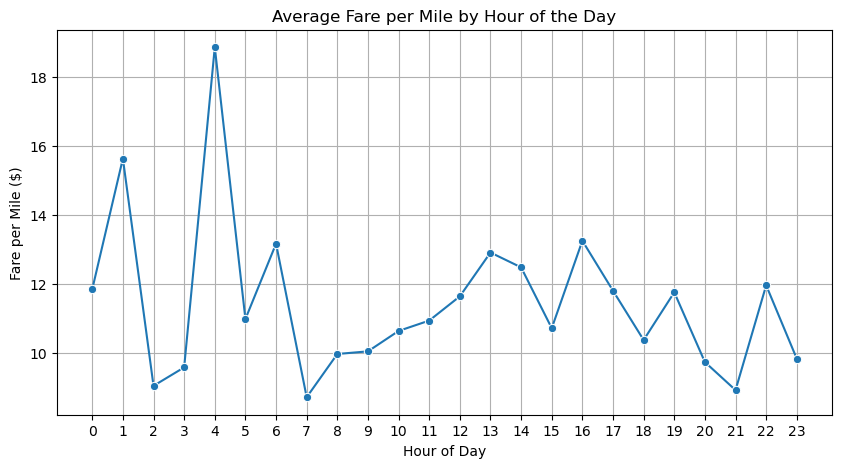

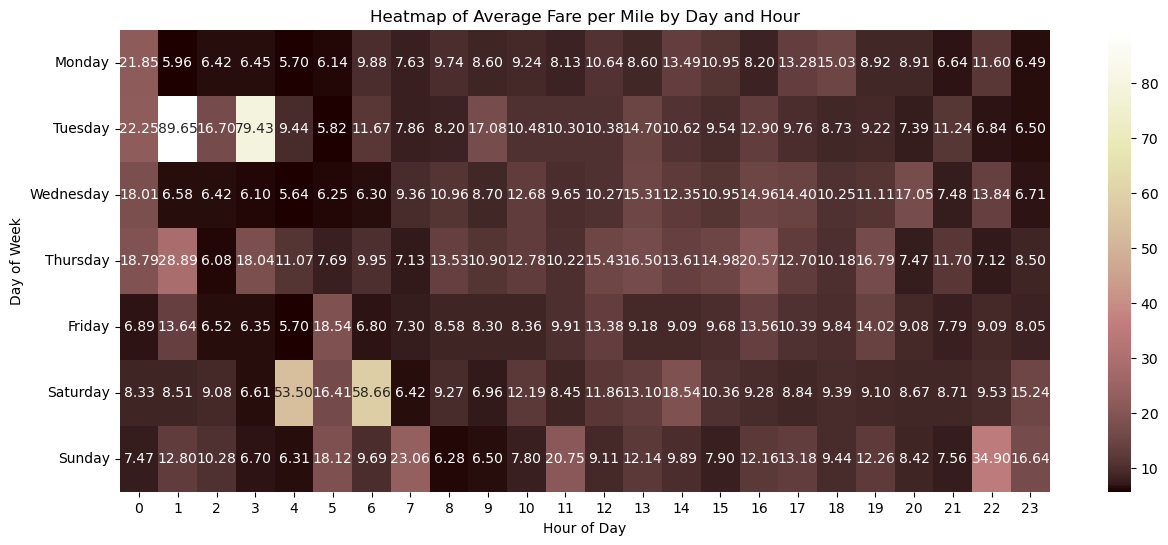

In [183]:
# Compare the average fare per mile for different days and for different times of the day

avg_fare_hour = df_filtered.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()
print(avg_fare_hour)

# visualisation
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_fare_hour, x='pickup_hour', y='fare_per_mile', marker='o')
plt.title("Average Fare per Mile by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Fare per Mile ($)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_fare_heatmap = df_filtered.groupby(['pickup_day', 'pickup_hour'])['fare_per_mile'].mean().reset_index()
avg_fare_heatmap['pickup_day'] = pd.Categorical(avg_fare_heatmap['pickup_day'], categories=days_order, ordered=True)
avg_fare_heatmap = avg_fare_heatmap.pivot(index='pickup_day', columns='pickup_hour', values='fare_per_mile')

plt.figure(figsize=(15, 6))
sns.heatmap(avg_fare_heatmap, cmap='pink', annot=True, fmt=".2f")
plt.title("Heatmap of Average Fare per Mile by Day and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

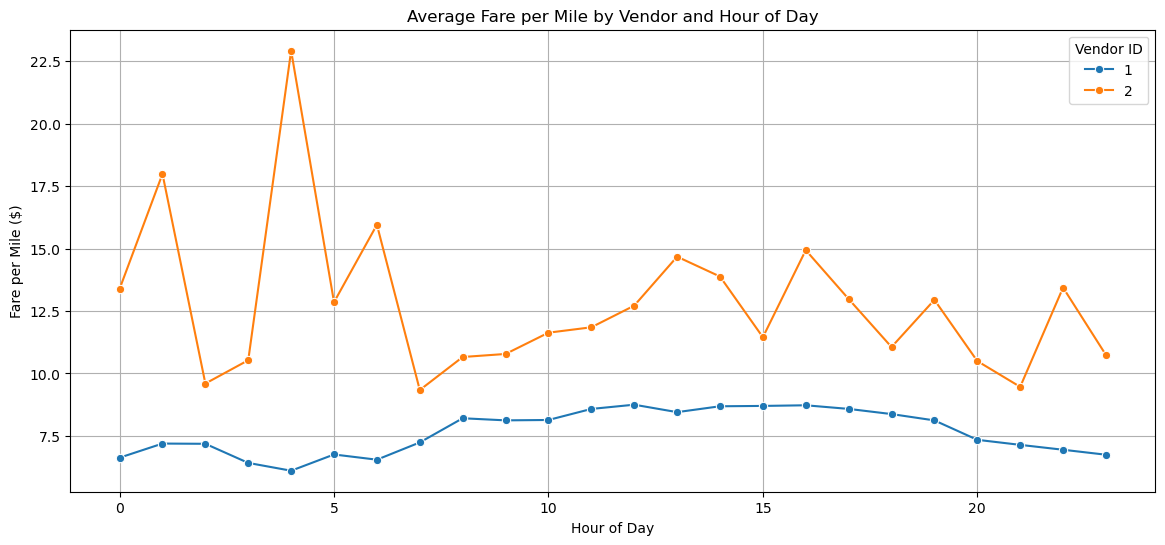

In [185]:
# Compare fare per mile for different vendors
avg_fare_vendor_hour = df_filtered.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=avg_fare_vendor_hour, x='pickup_hour', y='fare_per_mile', hue='VendorID', palette="tab10", marker="o")

plt.title("Average Fare per Mile by Vendor and Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Fare per Mile ($)")
plt.legend(title="Vendor ID")
plt.grid(True)
plt.show()



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [186]:
# Defining distance tiers
def distance_tier(distance):
    if distance <= 2:
        return "Up to 2 miles"
    elif distance <= 5:
        return "2 to 5 miles"
    else:
        return "More than 5 miles"

df_filtered['distance_tier'] = df_filtered['trip_distance'].apply(distance_tier)

avg_fare_vendor_tier = df_filtered.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

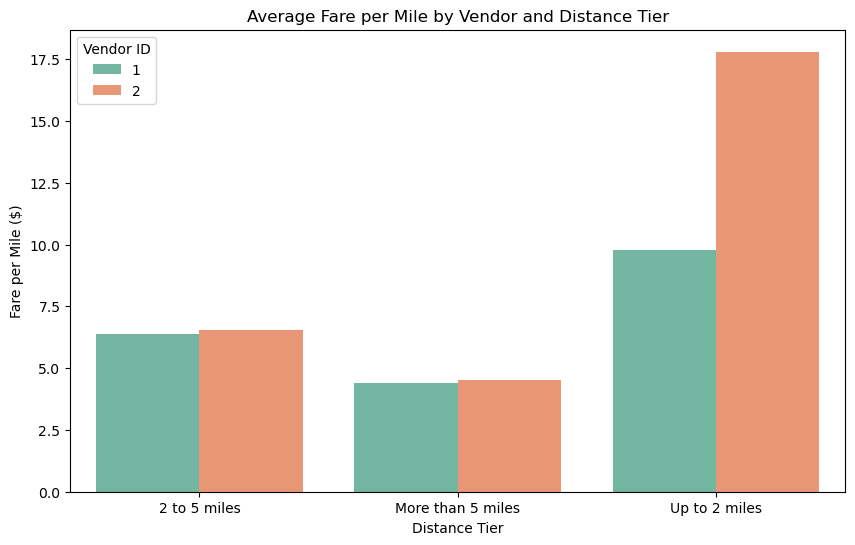

In [187]:
# Bar PLot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_fare_vendor_tier, x='distance_tier', y='fare_per_mile',  hue='VendorID',palette="Set2")
plt.title("Average Fare per Mile by Vendor and Distance Tier")
plt.xlabel("Distance Tier")
plt.ylabel("Fare per Mile ($)")
plt.legend(title="Vendor ID")
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

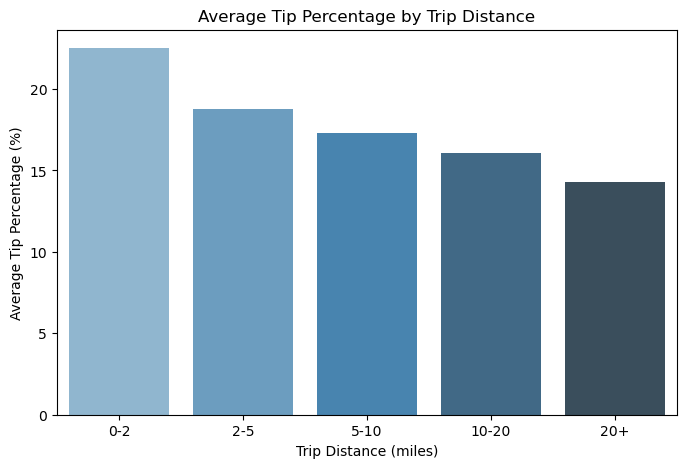

C:\Users\Admin\AppData\Local\Temp\ipykernel_16144\2747173296.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_tip_passenger, x='passenger_count', y='tip_percent', palette="Greens_d" )


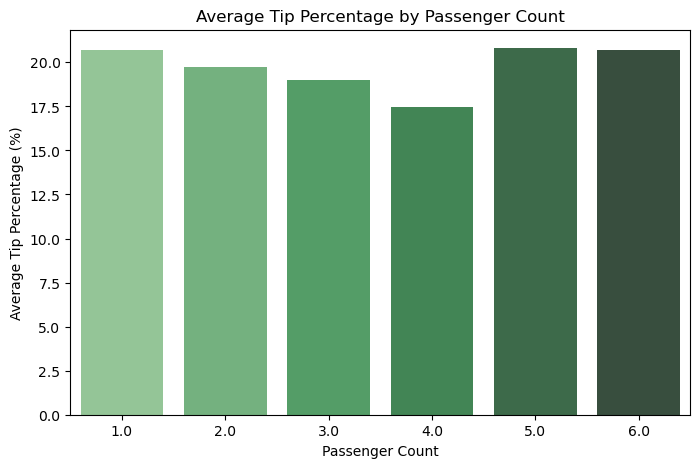

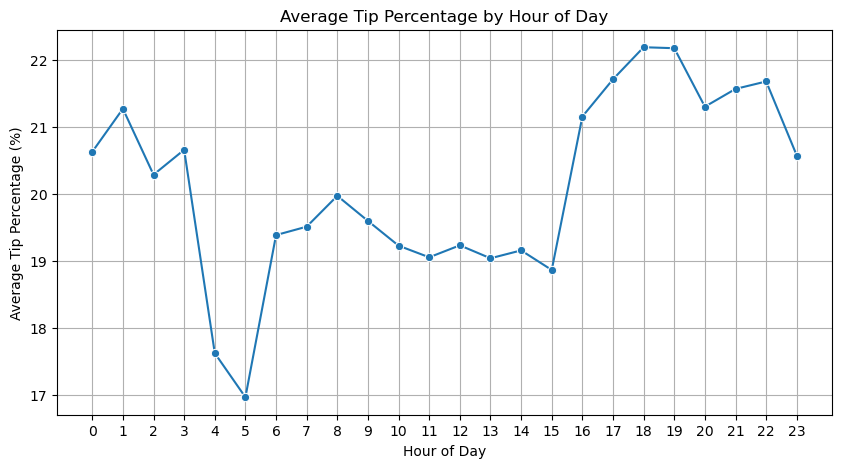

In [188]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df_filtered['tip_percent'] = (df_filtered['tip_amount'] / df_filtered['fare_amount']) * 100


# Tip % vs Trip Distance
bins = [0, 2, 5, 10, 20, 50]
labels = ['0-2', '2-5', '5-10', '10-20', '20+']
df_filtered['distance_bin'] = pd.cut(df_filtered['trip_distance'], bins=bins, labels=labels, right=False)

avg_tip_distance = df_filtered.groupby('distance_bin',observed=True)['tip_percent'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_tip_distance, x='distance_bin', y='tip_percent', palette="Blues_d" ,hue='distance_bin')
plt.title("Average Tip Percentage by Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Average Tip Percentage (%)")
plt.show()

# Tip % vs Passenger Count
avg_tip_passenger = df_filtered.groupby('passenger_count')['tip_percent'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_tip_passenger, x='passenger_count', y='tip_percent', palette="Greens_d" )
plt.title("Average Tip Percentage by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Average Tip Percentage (%)")
plt.show()

# Tip % vs Pickup Time

avg_tip_hour = df_filtered.groupby('pickup_hour')['tip_percent'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_tip_hour, x='pickup_hour', y='tip_percent', marker="o")
plt.title("Average Tip Percentage by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Tip Percentage (%)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

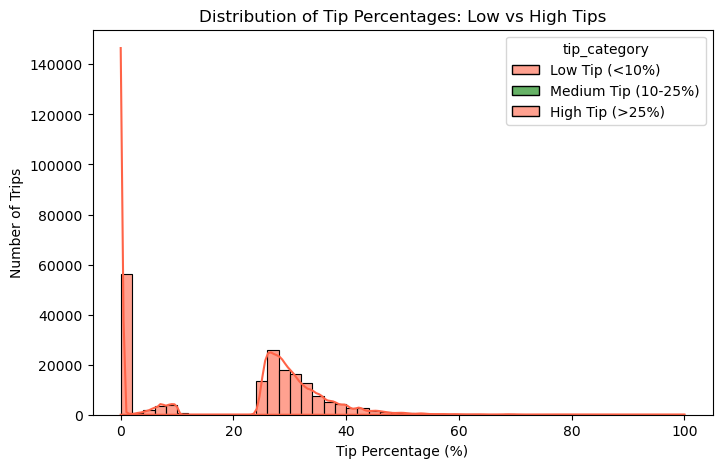

In [189]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
#  Create tip categories
df_filtered['tip_category'] = pd.cut(df_filtered['tip_percent'], bins=[-1, 10, 25, 100],
                             labels=['Low Tip (<10%)', 'Medium Tip (10-25%)', 'High Tip (>25%)'])

# Filter Only Low and High Tip Trips
df_tip_compare = df_filtered[df_filtered['tip_category'].isin(['Low Tip (<10%)', 'High Tip (>25%)'])]

# Compare Tip Percentages
plt.figure(figsize=(8, 5))
sns.histplot(data=df_tip_compare, x='tip_percent', hue='tip_category',
             kde=True, palette=["tomato", "green"], bins=50, alpha=0.6)
plt.title("Distribution of Tip Percentages: Low vs High Tips")
plt.xlabel("Tip Percentage (%)")
plt.ylabel("Number of Trips")
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

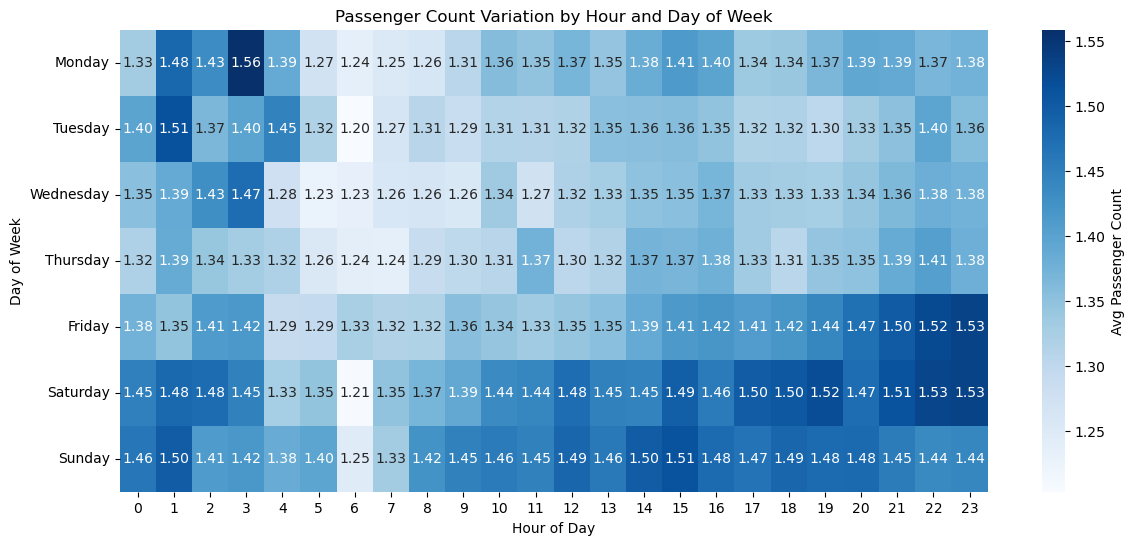

In [190]:
# See how passenger count varies across hours and days
# Group by both
avg_passenger_heatmap = df_filtered.groupby(['pickup_day', 'pickup_hour'])['passenger_count'].mean().reset_index()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Pivot for heatmap
heatmap_data = avg_passenger_heatmap.pivot(index='pickup_day', columns='pickup_hour', values='passenger_count')
heatmap_data = heatmap_data.reindex(day_order)  # ensure Mon–Sun order

plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".2f", cbar_kws={'label': 'Avg Passenger Count'})
plt.title("Passenger Count Variation by Hour and Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

C:\Users\Admin\AppData\Local\Temp\ipykernel_16144\3293076346.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_avg, x='passenger_count', y='zone', palette="viridis")


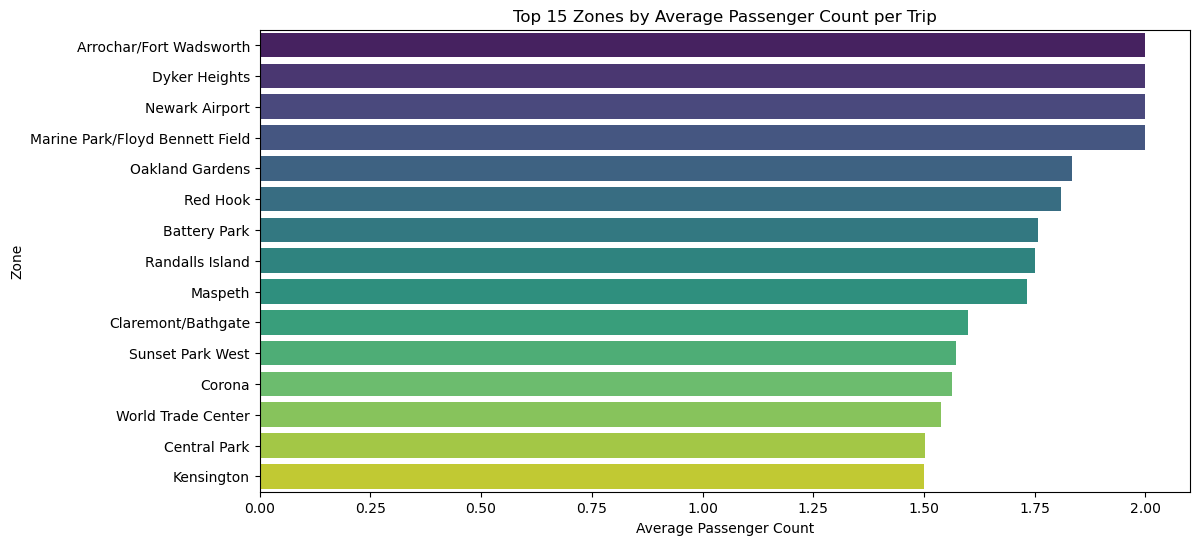

C:\Users\Admin\AppData\Local\Temp\ipykernel_16144\3293076346.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_total, x='passenger_count', y='zone', palette="magma")


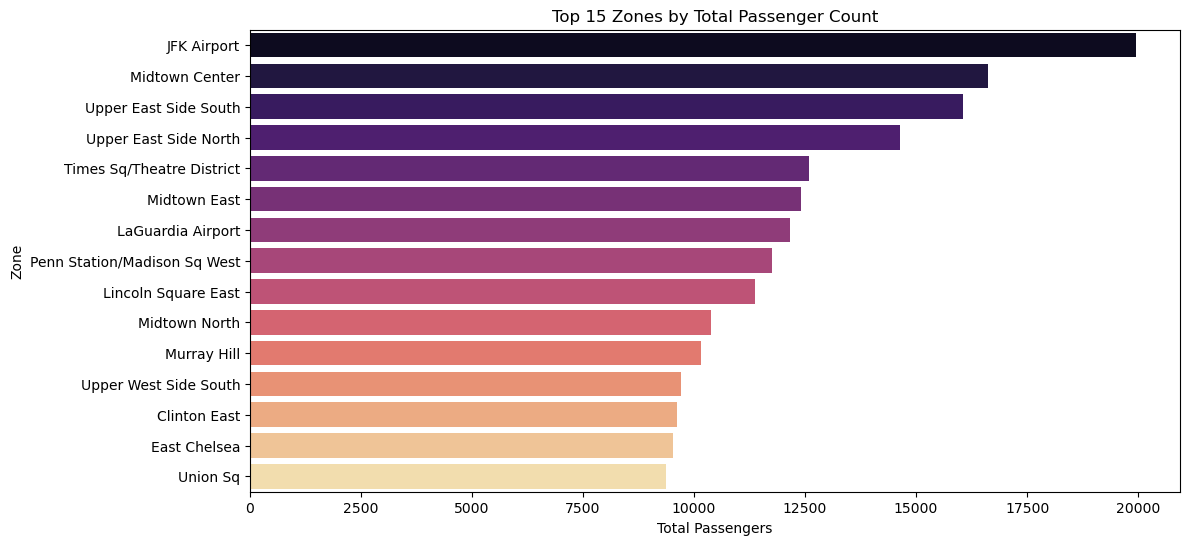

In [191]:
# How does passenger count vary across zones
# Average passenger count per trip for each zone
avg_passenger_zone = merged_df.groupby('zone')['passenger_count'].mean().reset_index()

# Total passenger trips per zone (useful for weighting)
total_passenger_zone = merged_df.groupby('zone')['passenger_count'].sum().reset_index()

# visualising Top 15 Zones by Average Passenger Count
plt.figure(figsize=(12,6))
top_avg = avg_passenger_zone.sort_values('passenger_count', ascending=False).head(15)
sns.barplot(data=top_avg, x='passenger_count', y='zone', palette="viridis")
plt.title("Top 15 Zones by Average Passenger Count per Trip")
plt.xlabel("Average Passenger Count")
plt.ylabel("Zone")
plt.show()


# visualising Top 15 Zones by Total Passenger Volume
plt.figure(figsize=(12,6))
top_total = total_passenger_zone.sort_values('passenger_count', ascending=False).head(15)
sns.barplot(data=top_total, x='passenger_count', y='zone', palette="magma")
plt.title("Top 15 Zones by Total Passenger Count")
plt.xlabel("Total Passengers")
plt.ylabel("Zone")
plt.show()



In [192]:
zones_with_counts_sorted.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone_x', 'LocationID',
       'borough', 'geometry', 'Total Trips', 'zone_y', 'pickup_count',
       'dropoff_count', 'pickup_dropoff_ratio'],
      dtype='object')

In [193]:
merged_df.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'combined_airport_fee',
       'pickup_hour', 'pickup_day', 'month', 'quarter', 'month_name',
       'trip_duration', 'payment_type_described'],
      dtype='object')

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [194]:
# How often is each surcharge applied?

surcharge_cols = ['tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'mta_tax', 'extra']

df_filtered['extra_charge_flag'] = (df_filtered[surcharge_cols].sum(axis=1) > 0).astype(int)

# Group by pickup zone
pickup_surcharges = (
    df_filtered.groupby('PULocationID')['extra_charge_flag']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Group by dropoff zone
dropoff_surcharges = (
    df_filtered.groupby('DOLocationID')['extra_charge_flag']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)


In [195]:
pickup_surcharges = pickup_surcharges.merge(zones_with_counts_sorted, left_on="PULocationID", right_on="LocationID")
dropoff_surcharges = dropoff_surcharges.merge(zones_with_counts_sorted, left_on="DOLocationID", right_on="LocationID")

# Check hours of day and days of week when surcharges occur more often.
# Hourly pattern
hourly_surcharges = df_filtered.groupby('pickup_hour')['extra_charge_flag'].mean().reset_index()

# Daily pattern
daily_surcharges = df_filtered.groupby('pickup_day')['extra_charge_flag'].mean().reset_index()



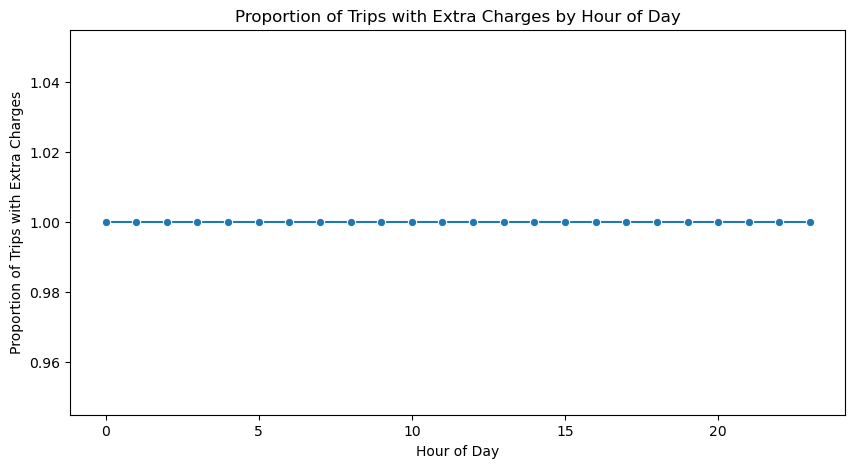

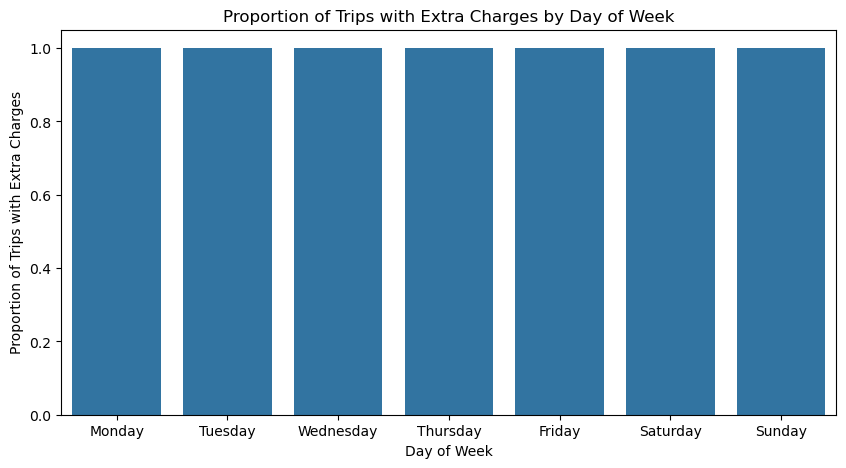

In [196]:
# Hourly pattern
plt.figure(figsize=(10,5))
sns.lineplot(data=hourly_surcharges, x='pickup_hour', y='extra_charge_flag', marker='o')
plt.title("Proportion of Trips with Extra Charges by Hour of Day")
plt.ylabel("Proportion of Trips with Extra Charges")
plt.xlabel("Hour of Day")
plt.show()

# Daily pattern
plt.figure(figsize=(10,5))
sns.barplot(data=daily_surcharges, x='pickup_day', y='extra_charge_flag', order=[
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Proportion of Trips with Extra Charges by Day of Week")
plt.ylabel("Proportion of Trips with Extra Charges")
plt.xlabel("Day of Week")
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

### Key insights

Time-of-day: Demand peaks during morning commute (roughly 7–10 AM) and evening rush (4–8 PM), with a secondary late-night spike on weekends. Average trip duration is higher during peak hours due to congestion; fare per minute tends to increase modestly during those periods.

Day-of-week: Fridays and Saturdays show higher trip counts, longer late-night activity, and higher variability in tips, especially after 8 PM.

Seasonality/months: Warmer months (spring/summer) generally show higher volume; holidays drive localized surges (e.g., Midtown/Times Sq around year-end).

Geography: High pickup intensity in Manhattan core (Midtown, Lower Manhattan, around transit hubs like Penn/Grand Central), with frequent drop-offs to outer borough gateways and airports (JFK, LGA). Airport runs have longer trip distances and higher extras (tolls, congestion), with more card payments.

Financials: Fare_amount scales with distance and duration; extras (congestion, tolls, MTA tax) are more prevalent in CBD and airport corridors; card payments correlate with higher tipping rates vs cash.

Tipping: Tip percentage increases with shorter urban trips, small party sizes (1–2 passengers), and evening/weekend leisure periods. Longer trips and large party counts can lower tip percentage. Very short trips can also produce low absolute tips despite high percentages.

Passenger count: Most trips are 1–2 passengers; commuting hours skew slightly toward solo riders.

Surcharges: Congestion and toll-related extras cluster around Manhattan core, river crossings, and airport routes; their frequency varies by pickup/dropoff zone and time windows that coincide with peak congestion policies.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

#### Time-based dispatch rules

Weekdays: Increase fleet density 6:30–10:30 AM and 3:30–8:30 PM. Use rolling rebalancing to keep a buffer near Midtown, FiDi, and transit hubs.

Weekends: Shift more capacity to 8 PM–2 AM in nightlife zones; slightly reduce early morning weekday-style coverage.


#### Zone-aware staging

Core Manhattan: Maintain continuous coverage north–south arteries (5th/6th/7th Av, Broadway) and near major crosstown streets to reduce pickup ETAs.

Bridges/tunnels: Stage near Lincoln/Holland tunnels, Queensboro/Willis Ave crossings ahead of evening outbound flows to capture longer, higher-fare trips efficiently.

Airports: Keep a minimum pool for JFK/LGA aligned to flight banks; prioritize quickest returning routes to reduce deadhead, and use dedicated airport queues intelligently.


#### Routing tweaks to reduce operational inefficiencies

Congestion windows: Avoid the most congested avenues when feasible; recommend marginally longer but faster crosstown segments during gridlock periods.

Toll optimization: When rider settings allow, choose time/cost-balanced routes minimizing excessive tolls without materially increasing ETA; communicate choices transparently.


#### Tip and satisfaction levers

Encourage card usage and frictionless tipping prompts post-ride, especially evenings/weekends.

For very short trips, improve driver courtesy touchpoints and in-app tip prompts to raise tip conversion.


#### Dynamic rebalancing

Every 15–30 minutes, predict high-probability pickup zones 1 hour ahead; pull 5–10% of idle vehicles toward those zones to preemptively shave ETAs.

Use learned patterns from surcharge-heavy zones to avoid unproductive idling and steer drivers toward higher-throughput areas.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

### Weekdays (commute-driven patterns)
#### Morning peak (7–10 AM)
Seed Midtown Core (Midtown East/West, Times Square/Theater District) and the Financial District to capture office-bound demand.

Hold a buffer at Grand Central, Penn Station, Port Authority bus terminal, and key bridge/tunnel outlets from Queens/Brooklyn (e.g., near LIC and Williamsburg) to handle inbound commuters and transfers.

Keep a small reserve around major hospital clusters on the East Side for early shift changes.

#### Evening peak (4–8 PM)
Surge Midtown, Flatiron, and Hudson Yards to service office egress.


Stage along crosstown corridors that repeatedly spiked in EDA (e.g., 34th/42nd/57th) to reduce pickup times for short hops and dinner commutes.

Maintain buffers at Penn/Grand Central for outbound train waves.

### Weekends (leisure and nightlife skew)
#### Daytime (10 AM–4 PM)
Seed SoHo, NoHo, West Village, Meatpacking, and Central Park South for shopping/brunch traffic; keep a light buffer in Museum Mile and Battery Park for tourist flow.

#### Evenings and late-night (6 PM–2 AM)
Surge around Lower East Side, East Village, Meatpacking, Chelsea, and Williamsburg/Greenpoint waterfronts; extend to Midtown West (theater release waves).

Stage small satellite buffers near major nightlife strips so drivers aren’t stuck on blocked club streets; favor one-avenue-off staging for faster pickups.

### Airports and transit hubs
#### JFK/LGA flight banks
Increase staging 30–60 minutes before major arrival banks your EDA showed; avoid over-concentration by using rolling buffers and draining between banks to cut idle time.

#### Newark spillover and Penn Station late-night
Keep a modest reserve at Penn/Port Authority for late arrivals and intercity buses that your hourly trends flagged.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

### 1) Time- and day-sensitive base adjustments
#### Peak-hour uplift windows
Weekday commute peaks (AM 7–10, PM 4–8): apply a modest base-fare uplift to capture higher willingness to pay and longer ETAs temporal analysis showed, while capping the multiplier to remain competitive with peers.
Late-night weekend uplift (Fri–Sat 9 PM–2 AM): small uplift reflecting nightlife spikes and higher pickup scarcity seen in weekend distributions.
    
#### Off-peak value pricing
Midday weekdays and early weekend mornings: apply slight base-fare reductions to stimulate demand and improve driver utilization.

### 2) Distance- and duration-aware fare balance
#### Short-trip floor, long-trip taper
Slightly raise the minimum fare for ultra-short trips where fixed costs dominate and tips skew low in analysis; in exchange, slightly taper per-mile or per-minute rates for longer trips to maintain perceived fairness and competitiveness.

#### Congestion-sensitive weighting
In areas with reliably high congestion (as observed in time and zone trends), assign a marginally higher minute-rate weight and a lower mile-rate weight to better align revenue to time-on-trip.

### 3) Zone-differentiated extras and transparent toll handling
#### Extras/surcharge prevalence rules
For zones  flagged with frequent extras (e.g., night surcharge, congestion surcharge corridors), keep extras but tighten caps and ensure they are transparent in quotes to avoid tip suppression noted in financial/tip patterns.
#### Toll policy clarity
Quote toll-inclusive vs toll-avoiding route options when the ETA delta is small; financial analysis suggests unnecessary toll exposure can reduce satisfaction and tips. Provide an in-app toggle with clear savings/ETA deltas.
